# Calories Burnt Prediction

## Imports, data loading and overview

In [155]:
!pip install eli5

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import eli5
from eli5.sklearn import PermutationImportance

from joblib import dump, load

warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [157]:
filepath = '/content/calories.csv'

df = pd.read_csv(filepath)

df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [158]:
df = df.drop(columns=['User_ID'])

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [160]:
df.describe()

Age        Height        Weight      Duration    Heart_Rate  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      42.789800    174.465133     74.966867     15.530600     95.518533   
std       16.980264     14.258114     15.035657      8.319203      9.583328   
min       20.000000    123.000000     36.000000      1.000000     67.000000   
25%       28.000000    164.000000     63.000000      8.000000     88.000000   
50%       39.000000    175.000000     74.000000     16.000000     96.000000   
75%       56.000000    185.000000     87.000000     23.000000    103.000000   
max       79.000000    222.000000    132.000000     30.000000    128.000000   

          Body_Temp      Calories  
count  15000.000000  15000.000000  
mean      40.025453     89.539533  
std        0.779230     62.456978  
min       37.100000      1.000000  
25%       39.600000     35.000000  
50%       40.200000     79.000000  
75%       40.600000    138.000000  
max       41.500000    314.000000

In [161]:
df_male = df[df['Gender'] == 'male']
df_female = df[df['Gender'] == 'female']

In [162]:
df_male.describe()

Age       Height       Weight     Duration   Heart_Rate  \
count  7447.000000  7447.000000  7447.000000  7447.000000  7447.000000   
mean     42.844904   184.667517    86.825702    15.559420    95.630052   
std      17.022752     9.976179    10.180943     8.286255     9.564614   
min      20.000000   142.000000    54.000000     1.000000    67.000000   
25%      28.000000   178.000000    80.000000     8.000000    88.500000   
50%      39.000000   185.000000    87.000000    15.000000    96.000000   
75%      56.000000   191.000000    93.000000    23.000000   103.000000   
max      79.000000   222.000000   132.000000    30.000000   128.000000   

         Body_Temp     Calories  
count  7447.000000  7447.000000  
mean     40.031153    90.945750  
std       0.773619    66.125478  
min      37.200000     1.000000  
25%      39.600000    34.000000  
50%      40.200000    78.000000  
75%      40.600000   140.000000  
max      41.500000   314.000000

In [163]:
df_female.describe()

Age       Height       Weight     Duration   Heart_Rate  \
count  7553.000000  7553.000000  7553.000000  7553.000000  7553.000000   
mean     42.735469   164.405931    63.274460    15.502185    95.408579   
std      16.939220    10.089177     8.449548     8.352013     9.601109   
min      20.000000   123.000000    36.000000     1.000000    67.000000   
25%      28.000000   158.000000    57.000000     8.000000    88.000000   
50%      40.000000   164.000000    63.000000    16.000000    95.000000   
75%      56.000000   171.000000    69.000000    23.000000   103.000000   
max      79.000000   205.000000   101.000000    30.000000   122.000000   

         Body_Temp     Calories  
count  7553.000000  7553.000000  
mean     40.019833    88.153052  
std       0.784733    58.586980  
min      37.100000     2.000000  
25%      39.600000    36.000000  
50%      40.200000    80.000000  
75%      40.600000   135.000000  
max      41.500000   240.000000

## EDA

### Univariate Analysis

#### Gender

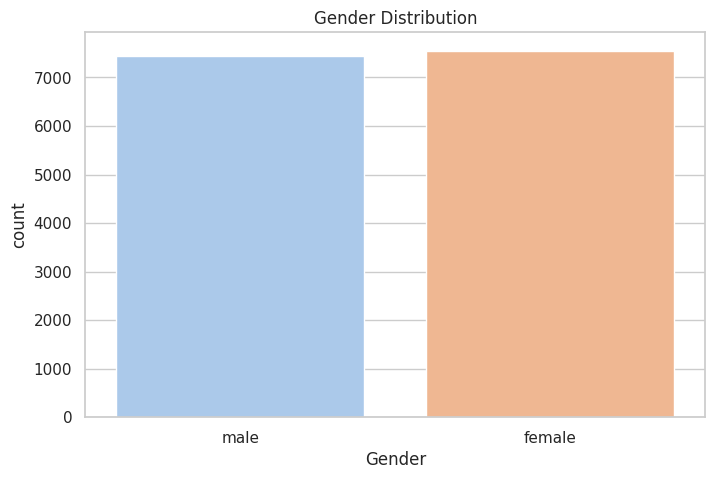

In [164]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='Gender', palette='pastel', hue='Gender')

plt.title('Gender Distribution')

plt.show()

In [165]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
female    7553
male      7447
Name: count, dtype: int64

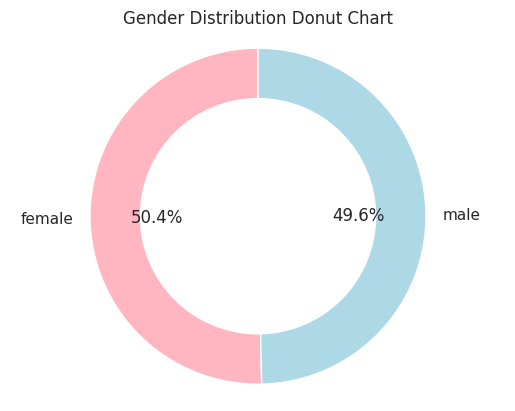

In [166]:
fig, ax = plt.subplots()

color_map = {
    'male': '#ADD8E6',    # light blue
    'female': '#FFB6C1'   # light pink
}

colors = [color_map[gender] for gender in gender_counts.index]

wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('Gender Distribution Donut Chart')

plt.show()

#### Age


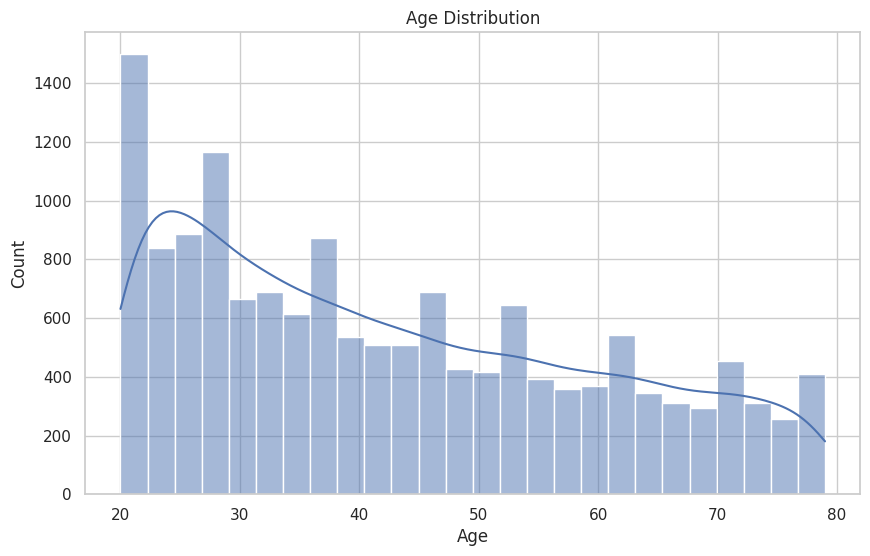

In [167]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', kde=True)

plt.title('Age Distribution')

plt.show()

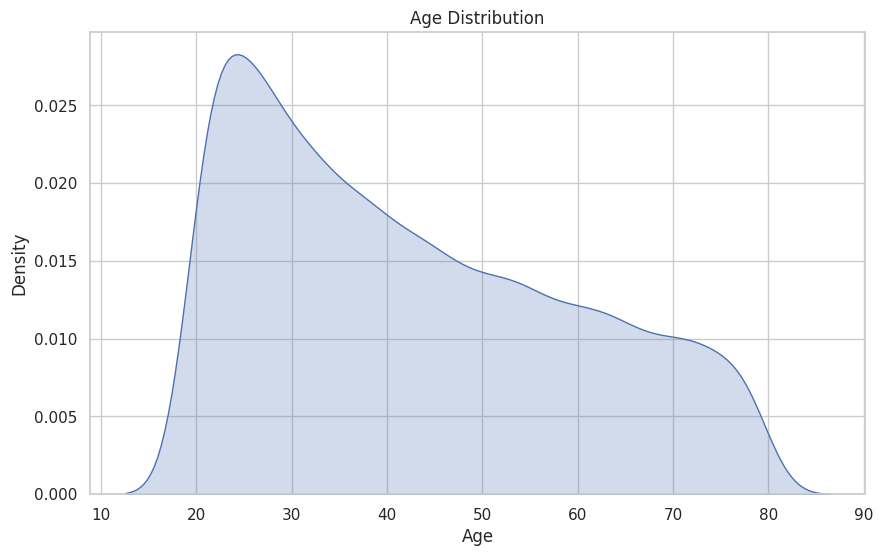

In [168]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Age', fill=True)

plt.title('Age Distribution')

plt.show()

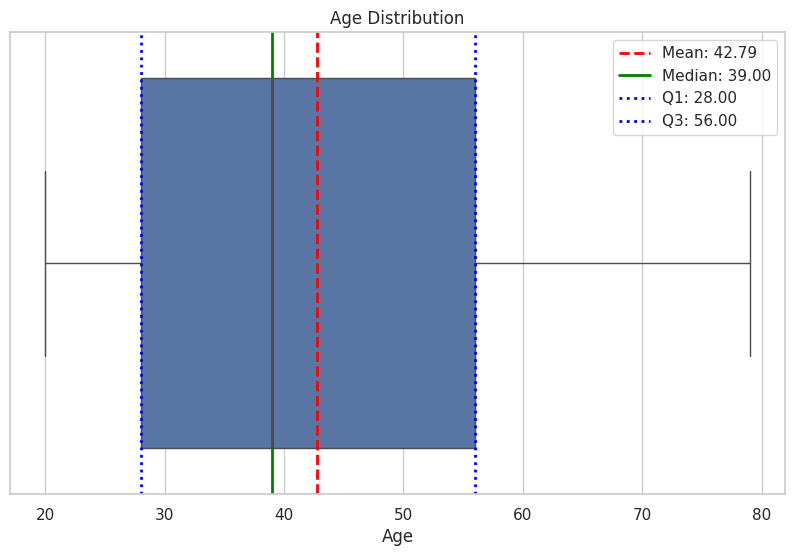

In [169]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Age')

plt.title('Age Distribution')

mean_val = df['Age'].mean()
median_val = df['Age'].median()
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [170]:
labels = ['20-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [19, 24, 34, 44, 54, 64, np.inf]

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_counts = df['Age_Group'].value_counts()
age_group_counts

Age_Group
25-34    3691
35-44    2754
20-24    2335
65+      2202
45-54    2176
55-64    1842
Name: count, dtype: int64

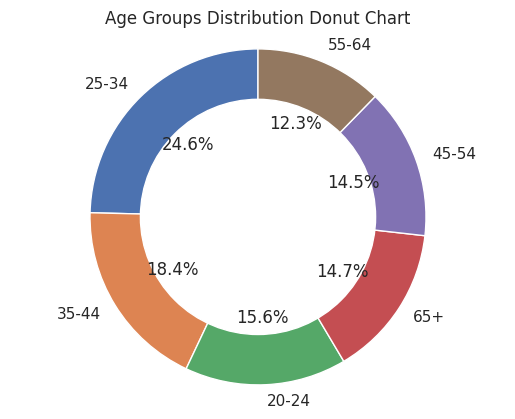

In [171]:
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('Age Groups Distribution Donut Chart')

plt.show()

#### Height



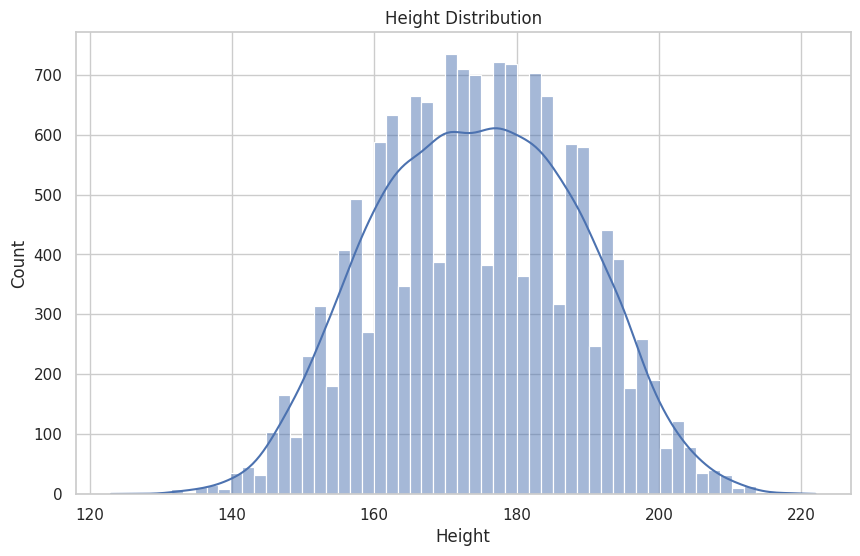

In [172]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Height', kde=True)

plt.title('Height Distribution')

plt.show()

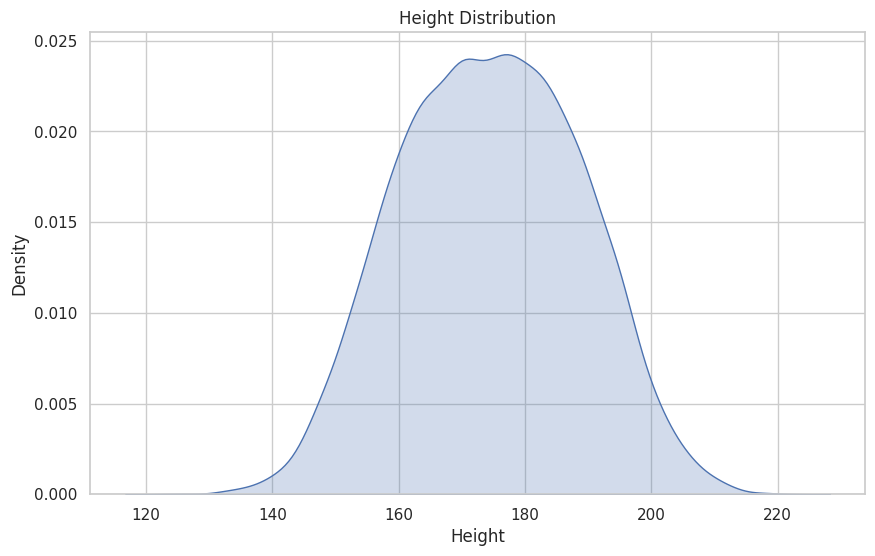

In [173]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Height', fill=True)

plt.title('Height Distribution')

plt.show()

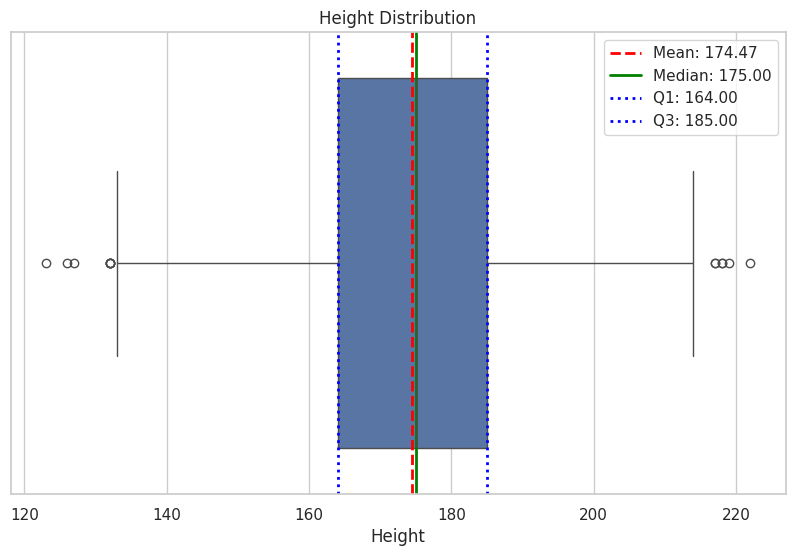

In [174]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Height')

plt.title('Height Distribution')

mean_val = df['Height'].mean()
median_val = df['Height'].median()
q1 = df['Height'].quantile(0.25)
q3 = df['Height'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [175]:
height_outliers = df[(df['Height'] < (q1 - 1.5 * (q3 - q1))) | (df['Height'] > (q3 + 1.5 * (q3 - q1)))]
height_outliers

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
529    female   35   132.0    38.0      30.0       112.0       40.5     216.0   
1464     male   51   217.0   118.0       4.0        85.0       39.1      19.0   
4200   female   63   123.0    40.0       9.0        97.0       39.9      55.0   
4404   female   20   132.0    41.0       5.0        85.0       39.3      20.0   
4855   female   59   132.0    40.0      10.0        92.0       39.9      55.0   
6226   female   58   127.0    40.0      29.0       102.0       40.8     189.0   
6711     male   40   218.0   132.0       1.0        88.0       37.8       5.0   
7774   female   30   126.0    39.0      25.0       104.0       40.7     156.0   
8931   female   26   132.0    36.0       5.0        91.0       39.2      24.0   
10362    male   22   222.0   128.0       6.0        84.0       39.3      20.0   
12189    male   21   219.0   126.0      15.0        97.0       40.4      78.0   
12360    male   41   218.0   119.0      18.0        85.0       40.2      76.0   
13100  female   51   132.0    41.0       6.0        86.0       39.2      28.0   
13276    male   55   217.0   126.0      17.0        91.0       40.4     101.0   

      Age_Group  
529       35-44  
1464      45-54  
4200      55-64  
4404      20-24  
4855      55-64  
6226      55-64  
6711      35-44  
7774      25-34  
8931      25-34  
10362     20-24  
12189     20-24  
12360     35-44  
13100     45-54  
13276     55-64

#### Weight


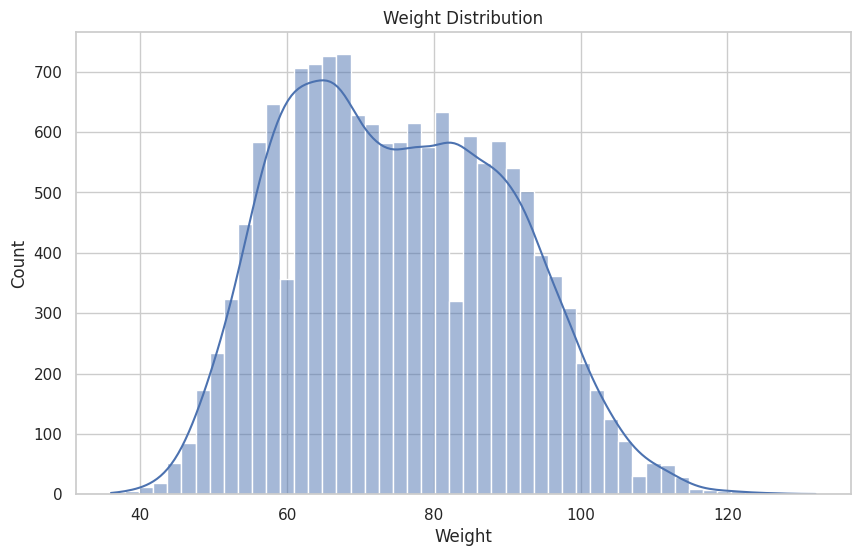

In [176]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Weight', kde=True)

plt.title('Weight Distribution')

plt.show()

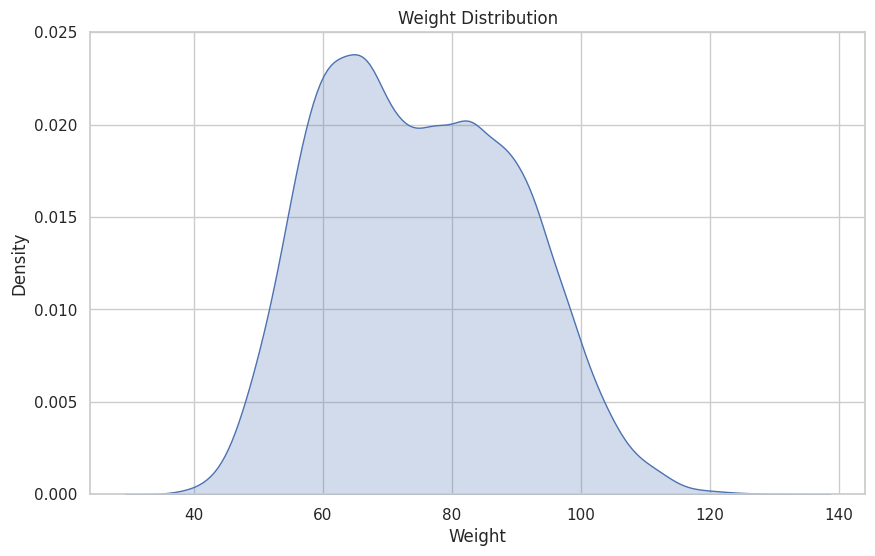

In [177]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Weight', fill=True)

plt.title('Weight Distribution')

plt.show()

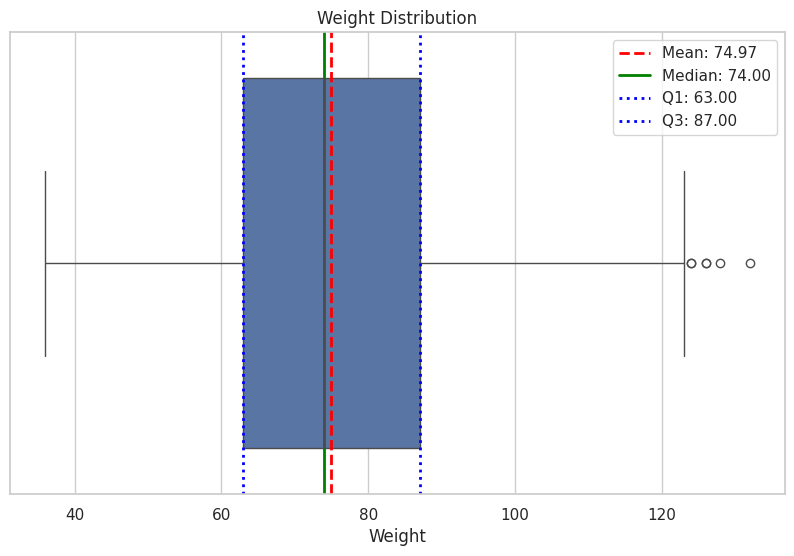

In [178]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Weight')

plt.title('Weight Distribution')

mean_val = df['Weight'].mean()
median_val = df['Weight'].median()
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [179]:
weight_outliers = df[(df['Weight'] < (q1 - 1.5 * (q3 - q1))) | (df['Weight'] > (q3 + 1.5 * (q3 - q1)))]
weight_outliers

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
1909    male   67   212.0   124.0      16.0        87.0       40.1      94.0   
6711    male   40   218.0   132.0       1.0        88.0       37.8       5.0   
10362   male   22   222.0   128.0       6.0        84.0       39.3      20.0   
12189   male   21   219.0   126.0      15.0        97.0       40.4      78.0   
13276   male   55   217.0   126.0      17.0        91.0       40.4     101.0   
13806   male   43   214.0   124.0      17.0       103.0       40.7     121.0   

      Age_Group  
1909        65+  
6711      35-44  
10362     20-24  
12189     20-24  
13276     55-64  
13806     35-44

#### Duration


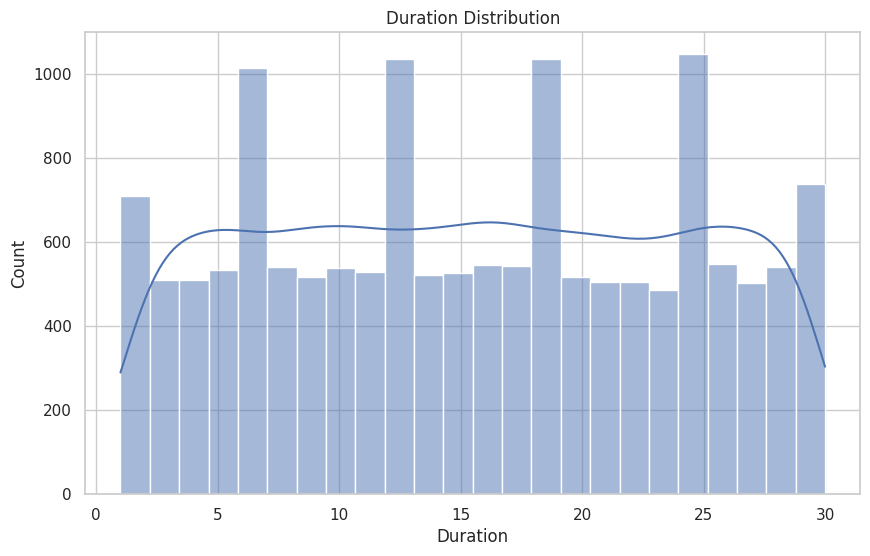

In [180]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Duration', kde=True)

plt.title('Duration Distribution')

plt.show()

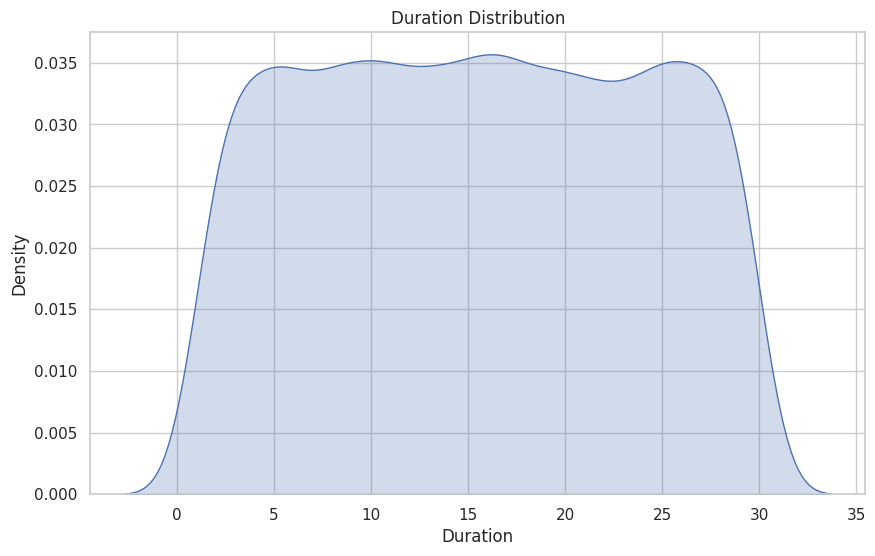

In [181]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Duration', fill=True)

plt.title('Duration Distribution')

plt.show()

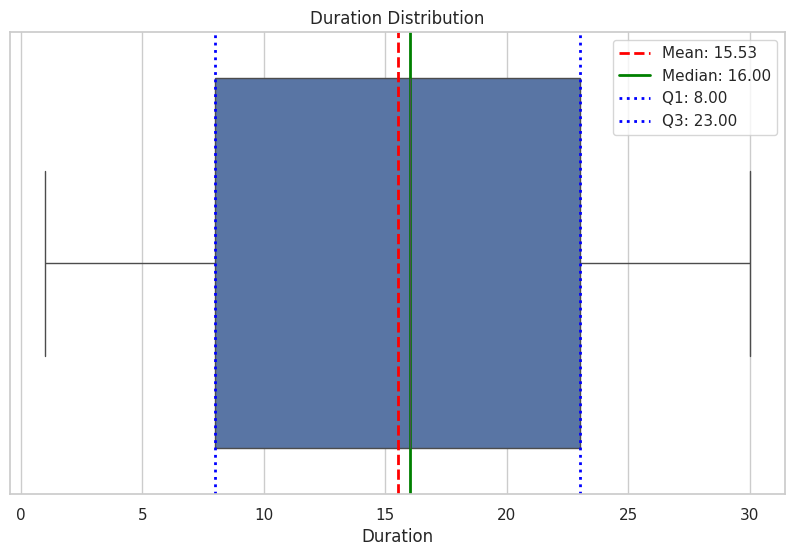

In [182]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Duration')

plt.title('Duration Distribution')

mean_val = df['Duration'].mean()
median_val = df['Duration'].median()
q1 = df['Duration'].quantile(0.25)
q3 = df['Duration'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

#### Heart rate


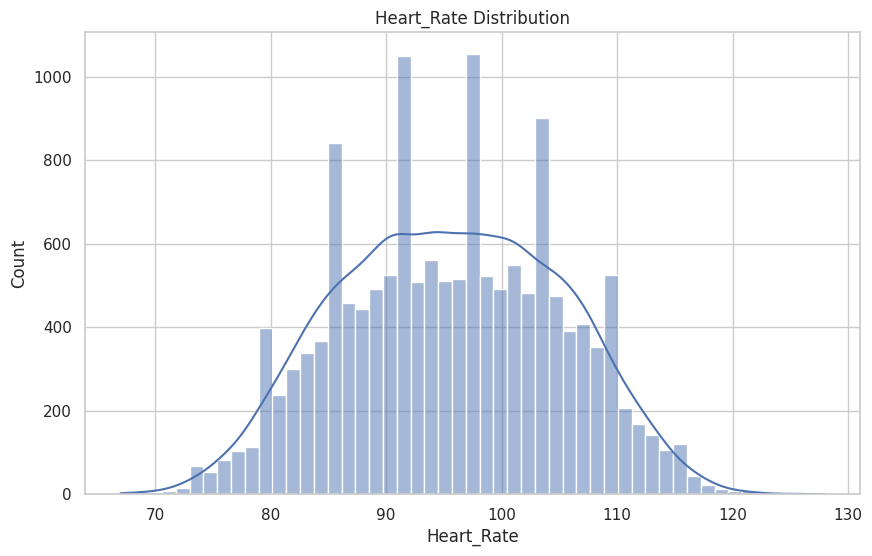

In [183]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Heart_Rate', kde=True)

plt.title('Heart_Rate Distribution')

plt.show()

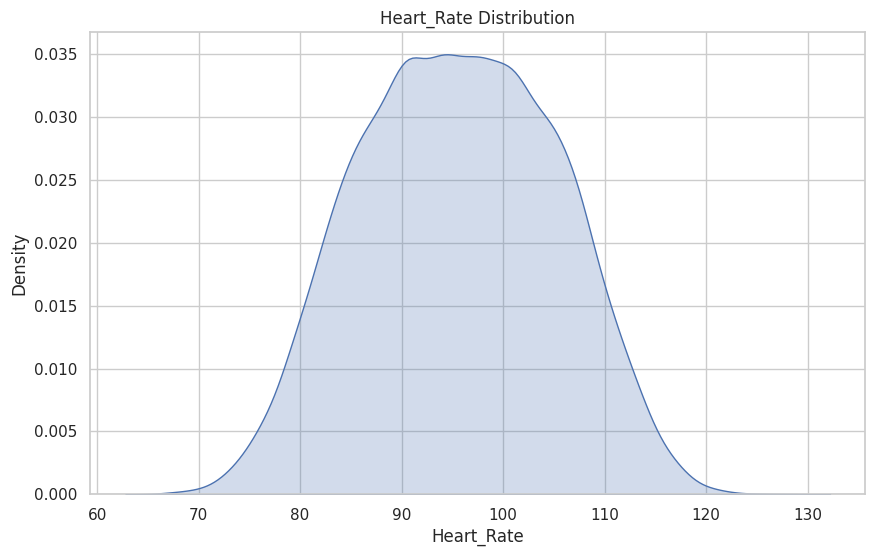

In [184]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Heart_Rate', fill=True)

plt.title('Heart_Rate Distribution')

plt.show()

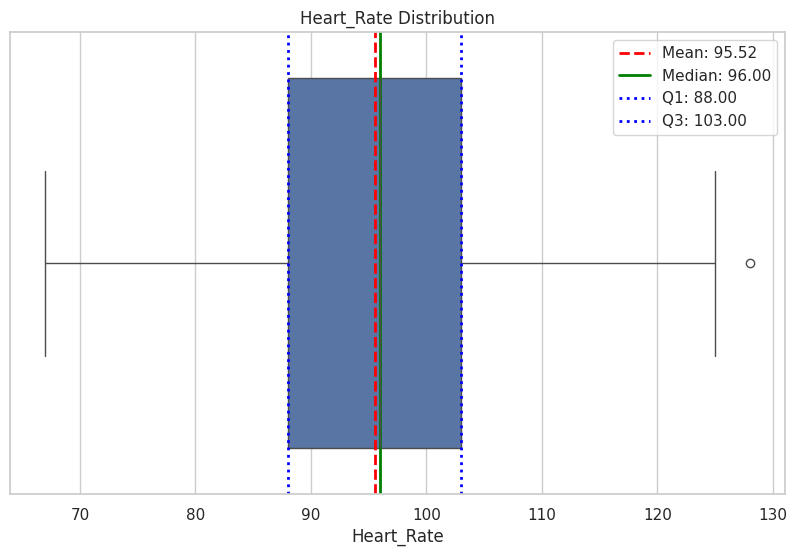

In [185]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Heart_Rate')

plt.title('Heart_Rate Distribution')

mean_val = df['Heart_Rate'].mean()
median_val = df['Heart_Rate'].median()
q1 = df['Heart_Rate'].quantile(0.25)
q3 = df['Heart_Rate'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [186]:
heart_rate_outliers = df[(df['Heart_Rate'] < (q1 - 1.5 * (q3 - q1))) | (df['Heart_Rate'] > (q3 + 1.5 * (q3 - q1)))]
heart_rate_outliers

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
9981   male   32   188.0    91.0      30.0       128.0       40.9     289.0   

     Age_Group  
9981     25-34

#### Body temp


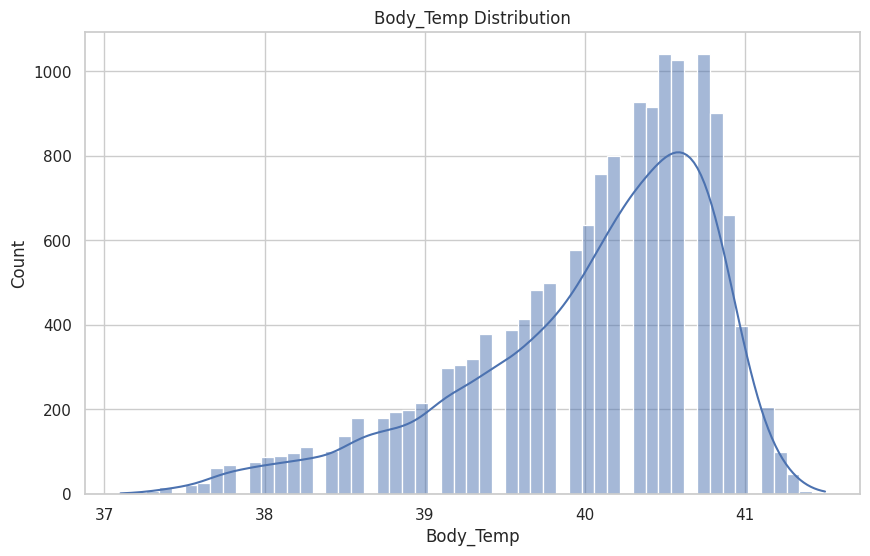

In [187]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Body_Temp', kde=True)

plt.title('Body_Temp Distribution')

plt.show()

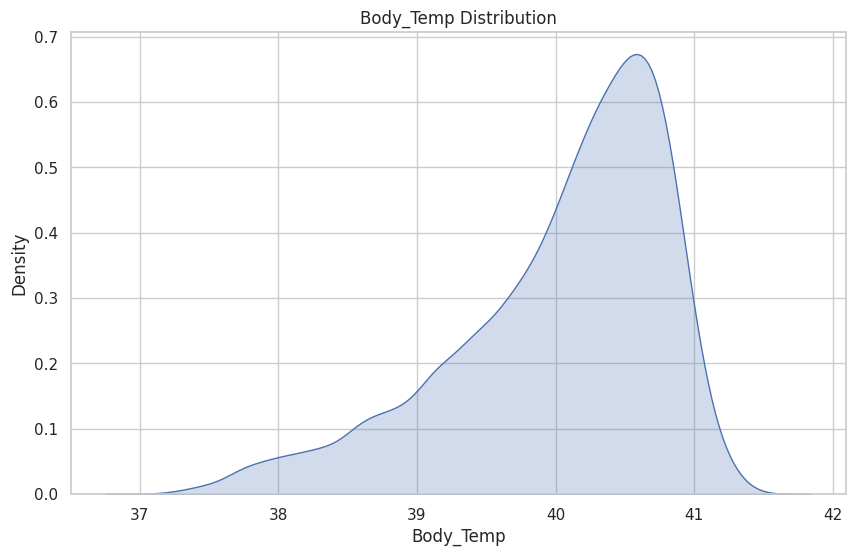

In [188]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Body_Temp', fill=True)

plt.title('Body_Temp Distribution')

plt.show()

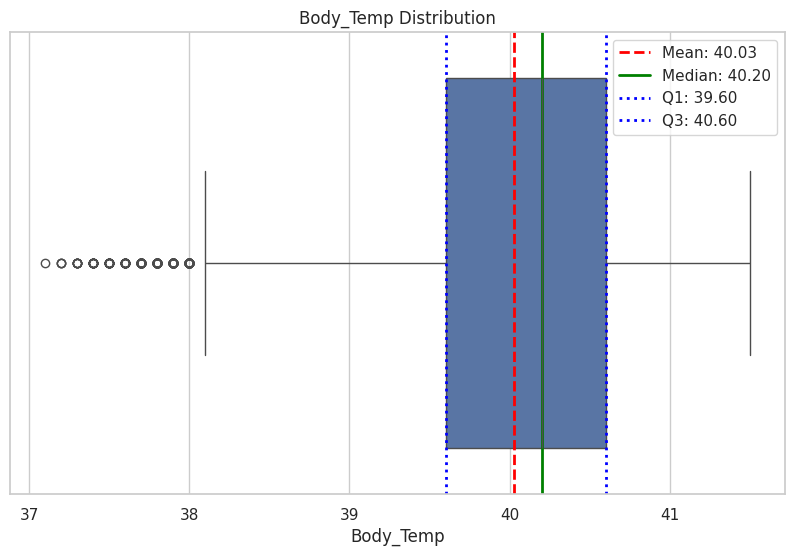

In [189]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Body_Temp')

plt.title('Body_Temp Distribution')

mean_val = df['Body_Temp'].mean()
median_val = df['Body_Temp'].median()
q1 = df['Body_Temp'].quantile(0.25)
q3 = df['Body_Temp'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [190]:
body_temp_outliers = df[(df['Body_Temp'] < (q1 - 1.5 * (q3 - q1))) | (df['Body_Temp'] > (q3 + 1.5 * (q3 - q1)))]
body_temp_outliers

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
10     female   36   177.0    76.0       1.0        74.0       37.8       3.0   
24       male   48   182.0    85.0       1.0        80.0       37.7       3.0   
49       male   48   152.0    59.0       2.0        79.0       38.0       5.0   
232      male   45   195.0    99.0       2.0        83.0       37.9       7.0   
301    female   31   169.0    69.0       1.0        74.0       37.6       3.0   
...       ...  ...     ...     ...       ...         ...        ...       ...   
14732    male   44   175.0    74.0       1.0        74.0       37.9       2.0   
14749    male   70   150.0    59.0       1.0        80.0       37.9       4.0   
14753    male   22   202.0   100.0       2.0        81.0       38.0       5.0   
14894    male   48   173.0    77.0       2.0        81.0       38.0       6.0   
14900    male   43   180.0    79.0       1.0        78.0       37.4       2.0   

      Age_Group  
10        35-44  
24        45-54  
49        45-54  
232       45-54  
301       25-34  
...         ...  
14732     35-44  
14749       65+  
14753     20-24  
14894     45-54  
14900     35-44  

[369 rows x 9 columns]

In [191]:
body_temp_outliers['Gender'].value_counts()

Gender
female    187
male      182
Name: count, dtype: int64

#### Calories

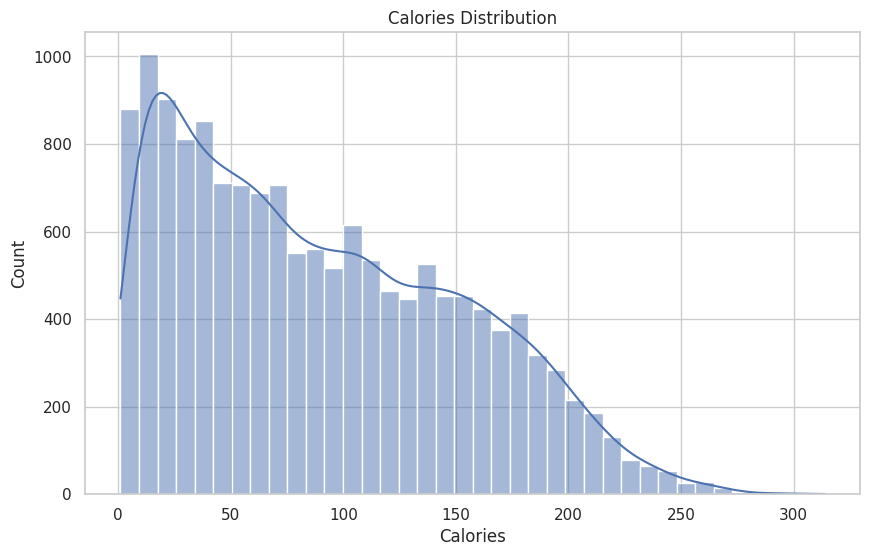

In [192]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Calories', kde=True)

plt.title('Calories Distribution')

plt.show()

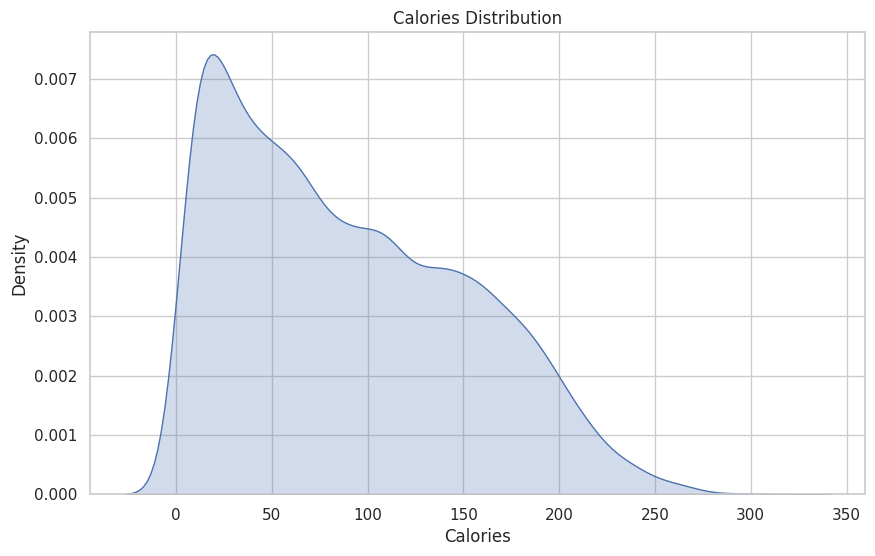

In [193]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Calories', fill=True)

plt.title('Calories Distribution')

plt.show()

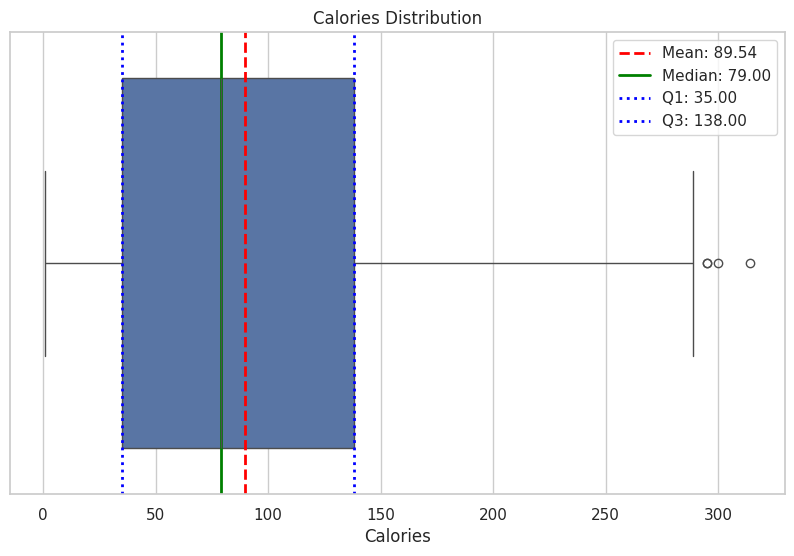

In [194]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Calories')

plt.title('Calories Distribution')

mean_val = df['Calories'].mean()
median_val = df['Calories'].median()
q1 = df['Calories'].quantile(0.25)
q3 = df['Calories'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='blue', linestyle=':', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f'Q3: {q3:.2f}')

plt.legend()

plt.show()

In [195]:
calories_outliers = df[(df['Calories'] < (q1 - 1.5 * (q3 - q1))) | (df['Calories'] > (q3 + 1.5 * (q3 - q1)))]
calories_outliers

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
428     male   75   199.0   103.0      28.0       123.0       40.5     314.0   
3357    male   65   189.0    98.0      27.0       125.0       40.9     295.0   
6240    male   69   193.0    90.0      29.0       121.0       41.1     300.0   
13871   male   75   178.0    76.0      29.0       120.0       40.8     295.0   

      Age_Group  
428         65+  
3357        65+  
6240        65+  
13871       65+

### Bivariate Analysis

#### Pairplot

<Figure size 1200x1200 with 0 Axes>

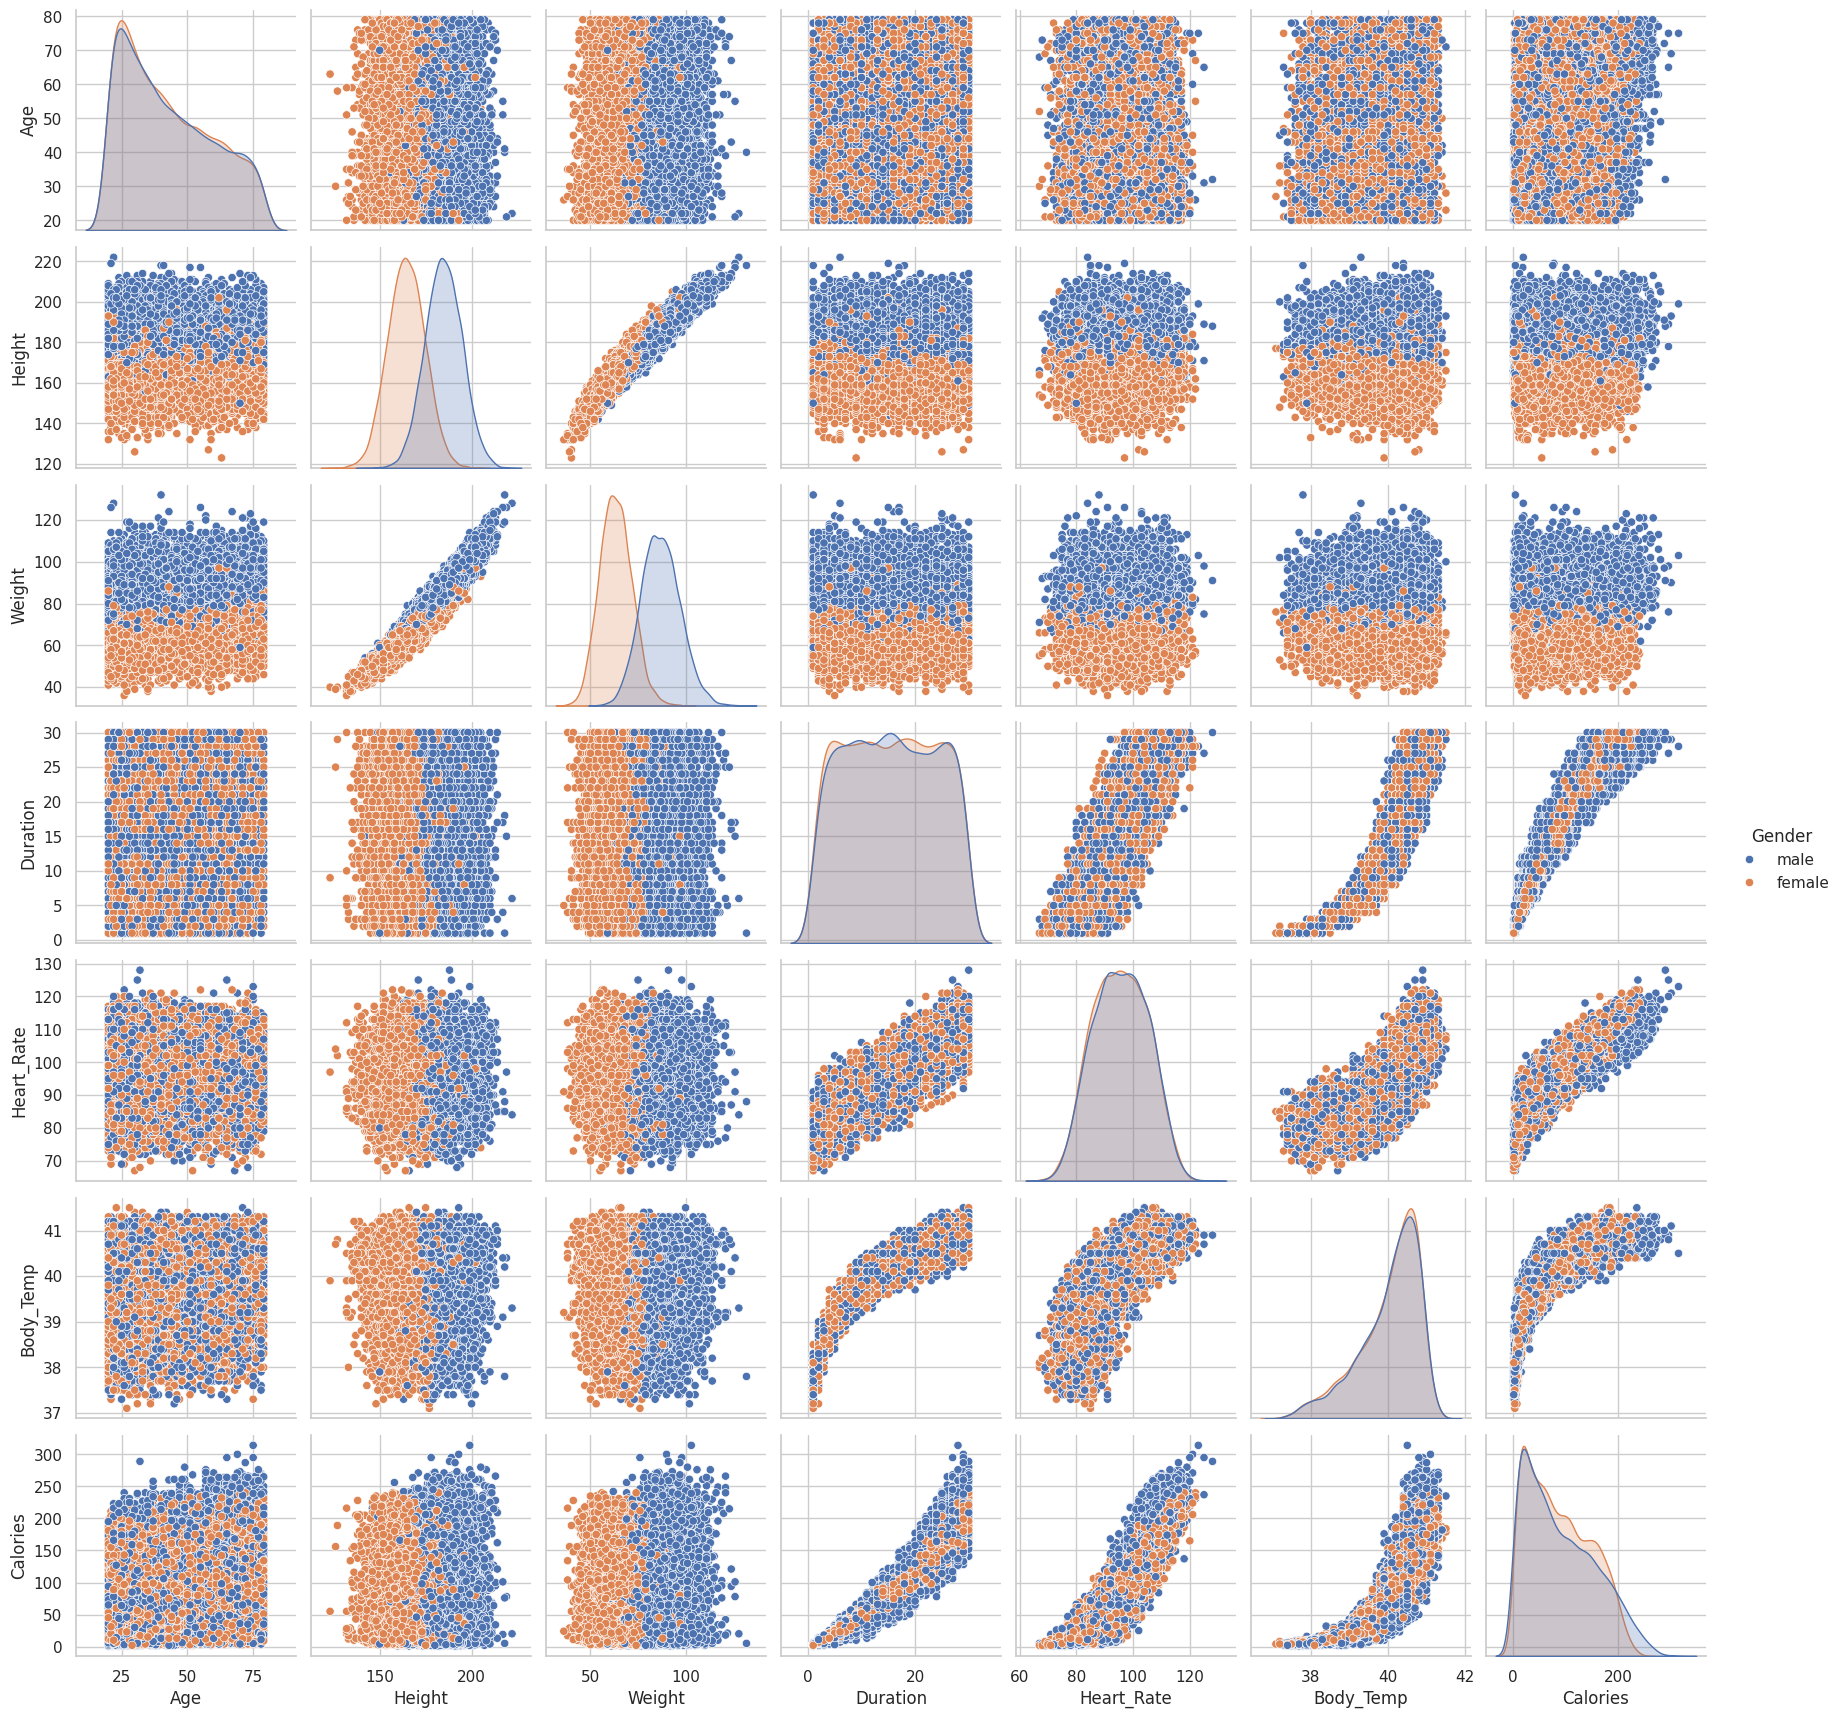

In [196]:
plt.figure(figsize=(12,12))

sns.pairplot(df, vars=["Age", "Height", "Weight", "Duration",
                       "Heart_Rate", "Body_Temp", "Calories"], hue="Gender")
plt.show();

#### Scatter plots

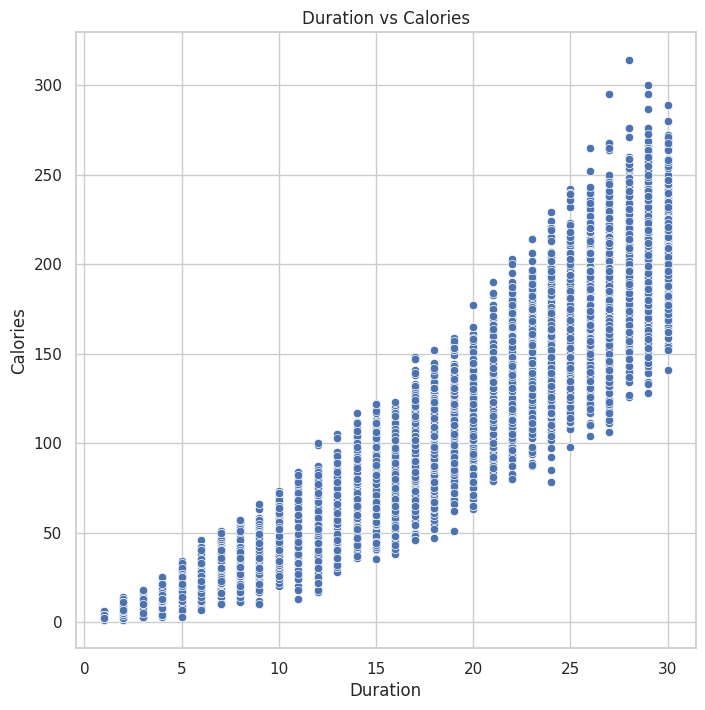

In [197]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df, x="Duration", y="Calories")

plt.title("Duration vs Calories")

plt.show()

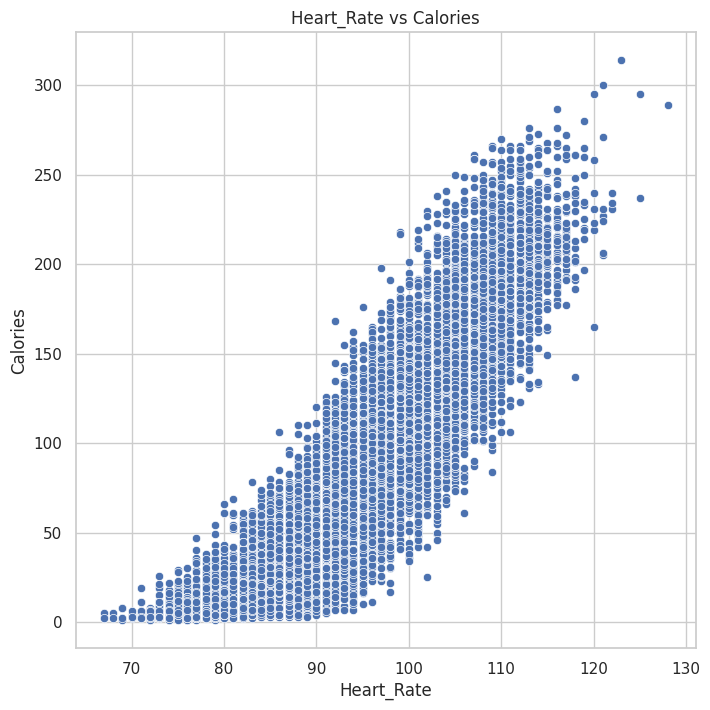

In [198]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df, x="Heart_Rate", y="Calories")

plt.title("Heart_Rate vs Calories")

plt.show()

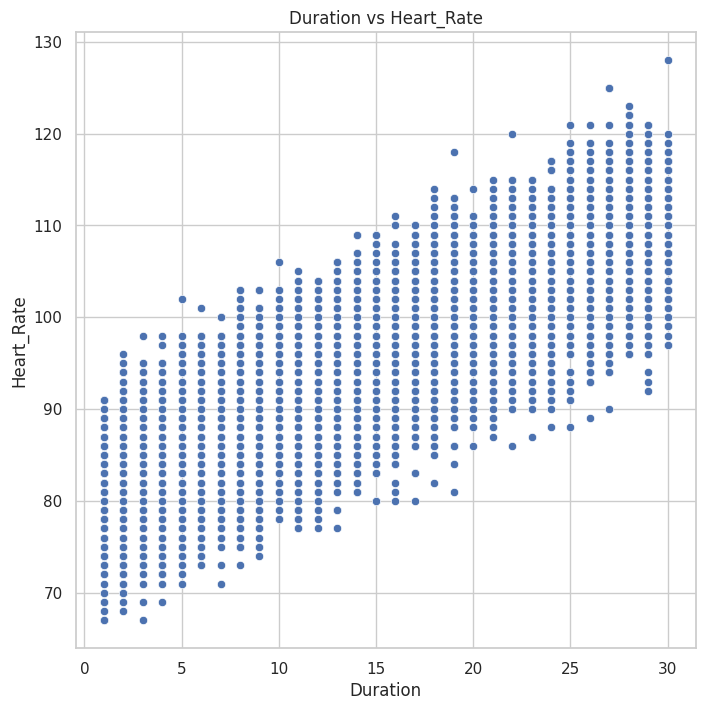

In [199]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df, x="Duration", y="Heart_Rate")

plt.title("Duration vs Heart_Rate")

plt.show()

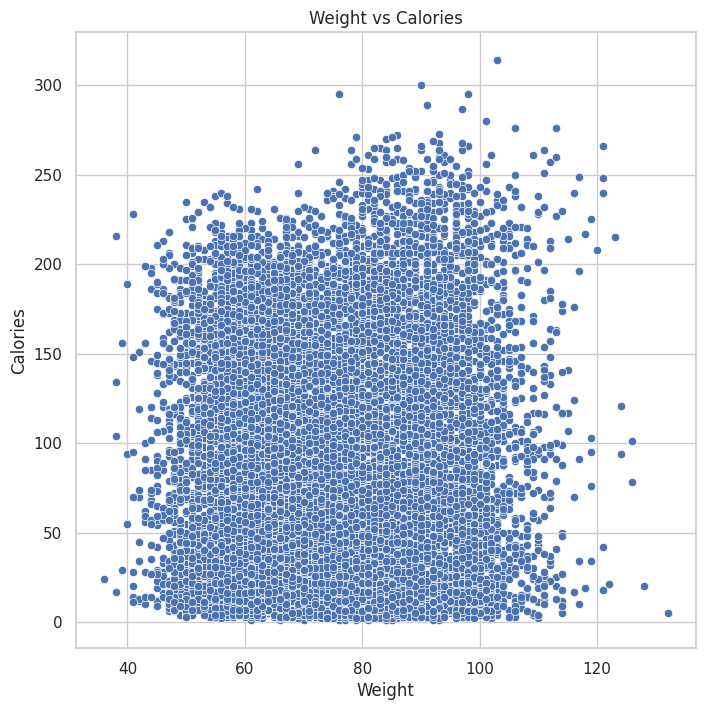

In [200]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df, x="Weight", y="Calories")

plt.title("Weight vs Calories")

plt.show()

#### Box and Violin plots

##### By Gender

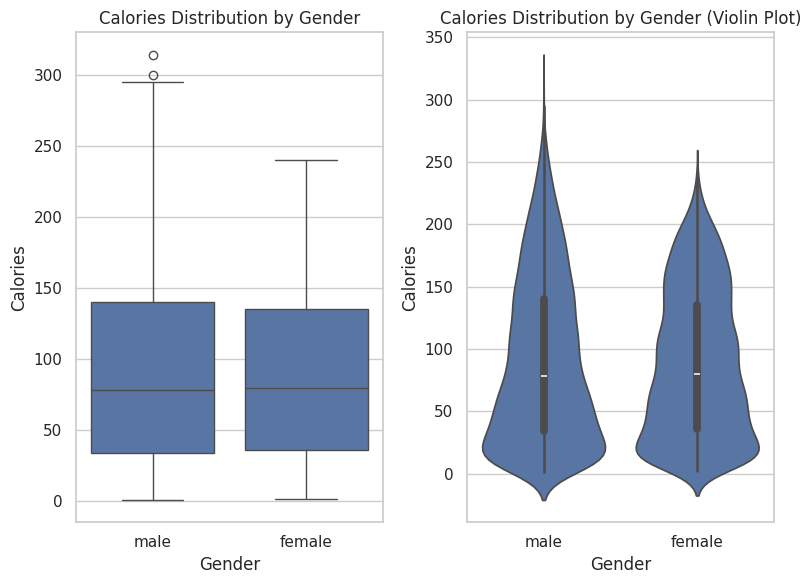

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(data=df, x='Gender', y='Calories', ax=axs[0])
axs[0].set_title('Calories Distribution by Gender')

sns.violinplot(data=df, x='Gender', y='Calories', ax=axs[1])
axs[1].set_title('Calories Distribution by Gender (Violin Plot)')

plt.tight_layout()

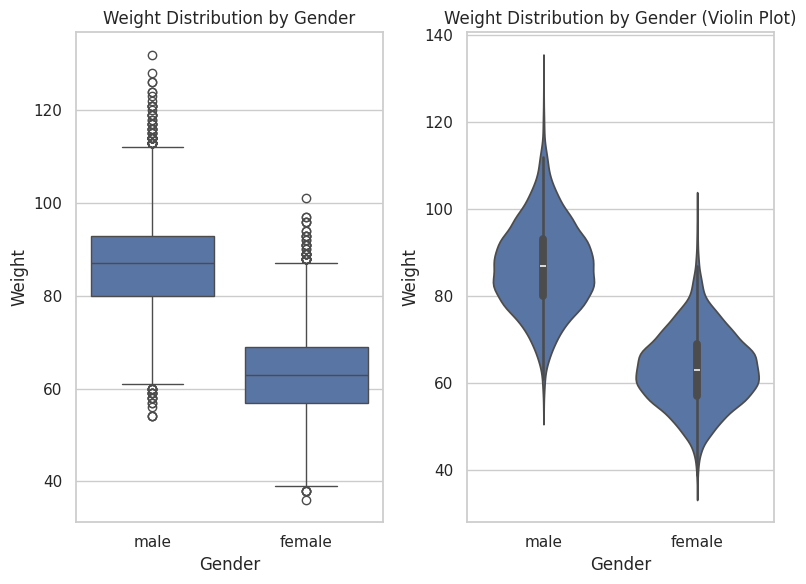

In [202]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(data=df, x='Gender', y='Weight', ax=axs[0])
axs[0].set_title('Weight Distribution by Gender')

sns.violinplot(data=df, x='Gender', y='Weight', ax=axs[1])
axs[1].set_title('Weight Distribution by Gender (Violin Plot)')

plt.tight_layout()

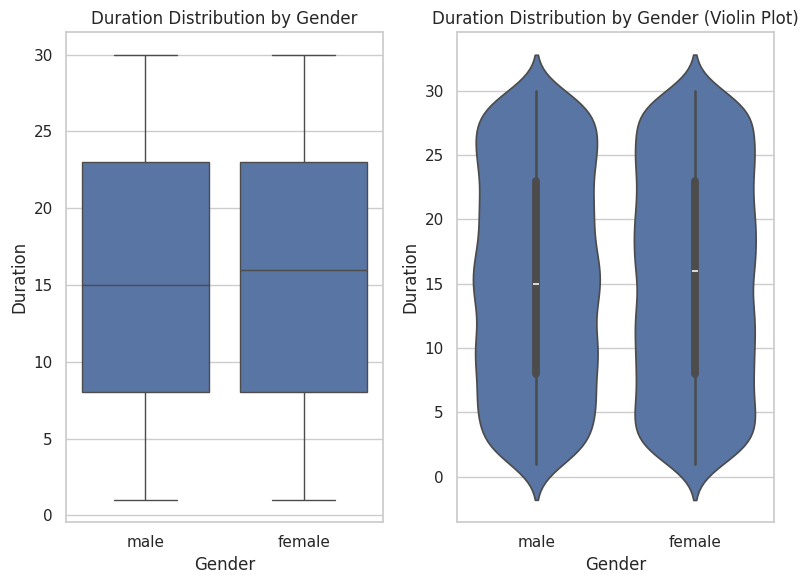

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(data=df, x='Gender', y='Duration', ax=axs[0])
axs[0].set_title('Duration Distribution by Gender')

sns.violinplot(data=df, x='Gender', y='Duration', ax=axs[1])
axs[1].set_title('Duration Distribution by Gender (Violin Plot)')

plt.tight_layout()

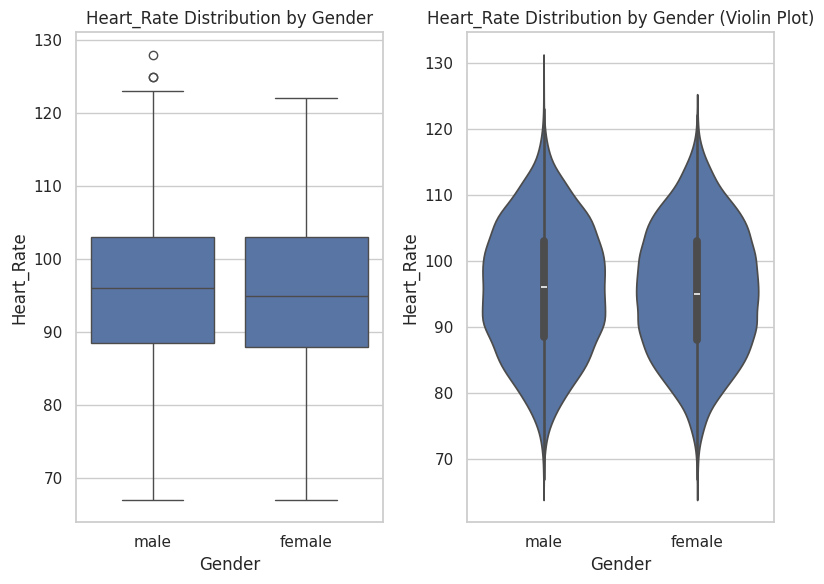

In [204]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(data=df, x='Gender', y='Heart_Rate', ax=axs[0])
axs[0].set_title('Heart_Rate Distribution by Gender')

sns.violinplot(data=df, x='Gender', y='Heart_Rate', ax=axs[1])
axs[1].set_title('Heart_Rate Distribution by Gender (Violin Plot)')

plt.tight_layout()

##### By Age Group

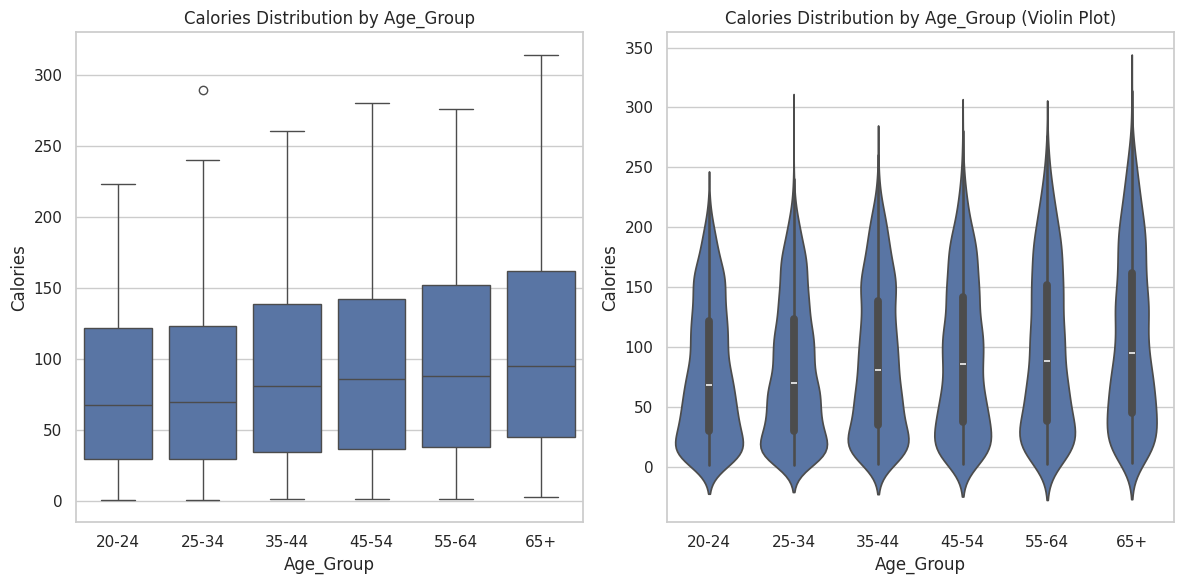

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Age_Group', y='Calories', ax=axs[0])
axs[0].set_title('Calories Distribution by Age_Group')

sns.violinplot(data=df, x='Age_Group', y='Calories', ax=axs[1])
axs[1].set_title('Calories Distribution by Age_Group (Violin Plot)')

plt.tight_layout()

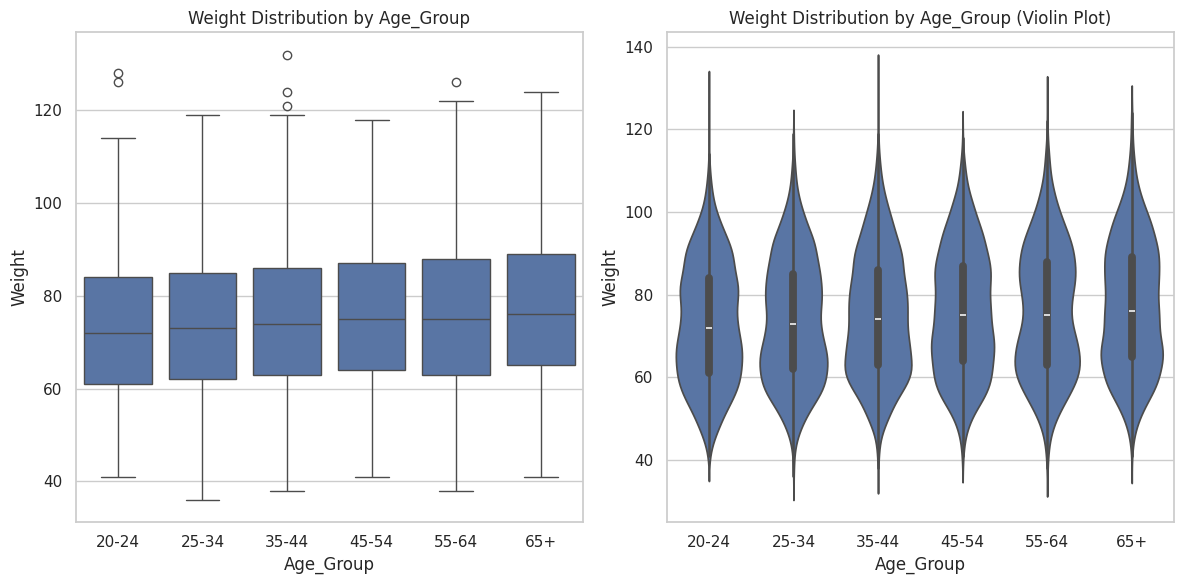

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Age_Group', y='Weight', ax=axs[0])
axs[0].set_title('Weight Distribution by Age_Group')

sns.violinplot(data=df, x='Age_Group', y='Weight', ax=axs[1])
axs[1].set_title('Weight Distribution by Age_Group (Violin Plot)')

plt.tight_layout()

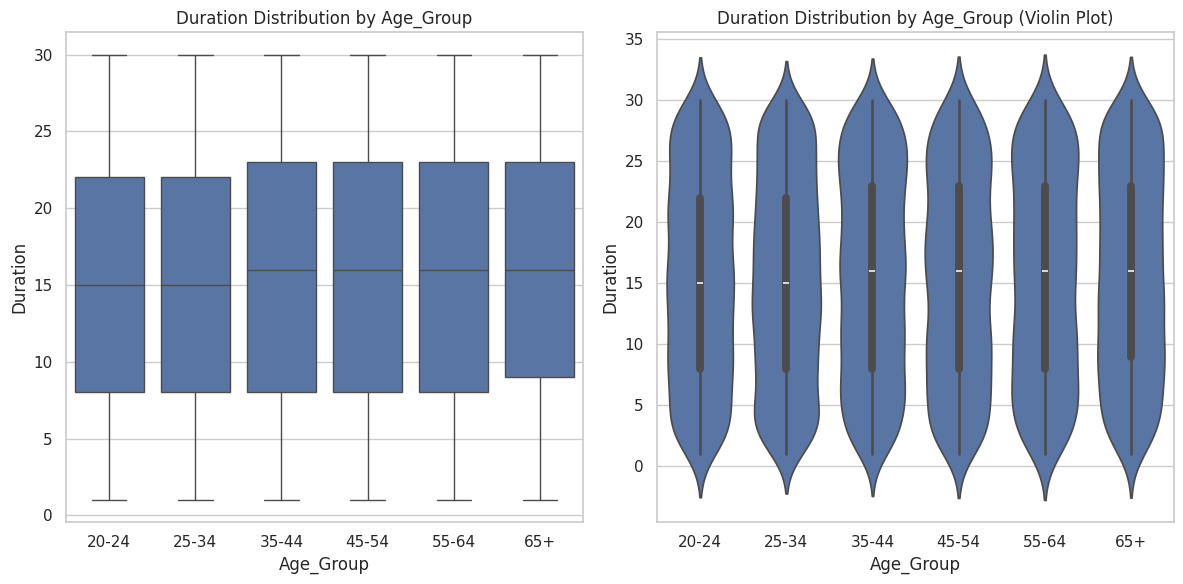

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Age_Group', y='Duration', ax=axs[0])
axs[0].set_title('Duration Distribution by Age_Group')

sns.violinplot(data=df, x='Age_Group', y='Duration', ax=axs[1])
axs[1].set_title('Duration Distribution by Age_Group (Violin Plot)')

plt.tight_layout()

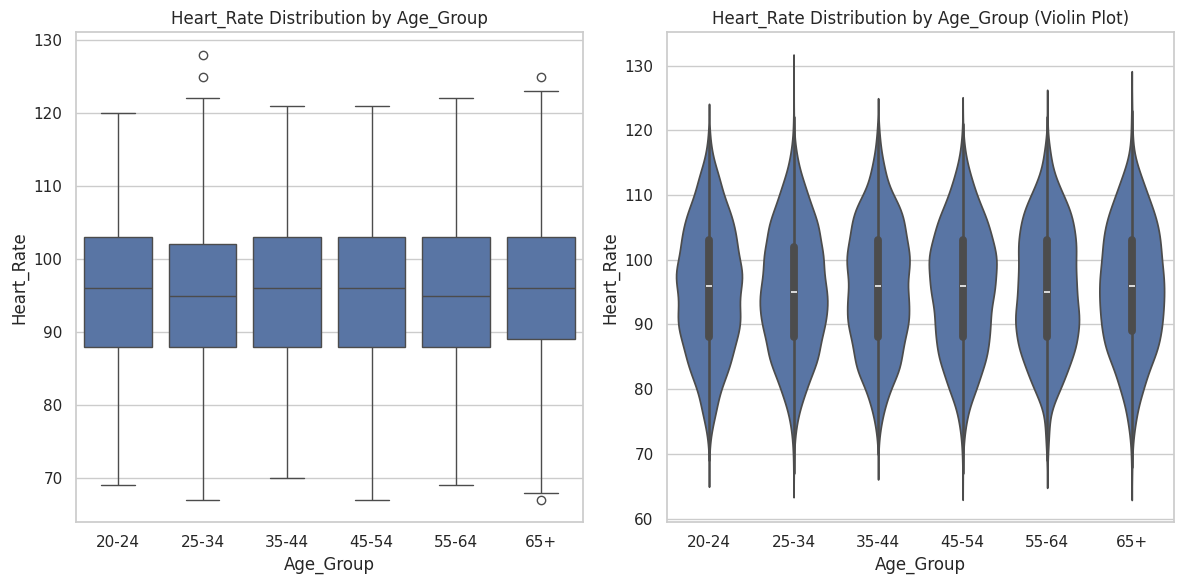

In [208]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Age_Group', y='Heart_Rate', ax=axs[0])
axs[0].set_title('Heart_Rate Distribution by Age_Group')

sns.violinplot(data=df, x='Age_Group', y='Heart_Rate', ax=axs[1])
axs[1].set_title('Heart_Rate Distribution by Age_Group (Violin Plot)')

plt.tight_layout()

### Multivariate Analysis

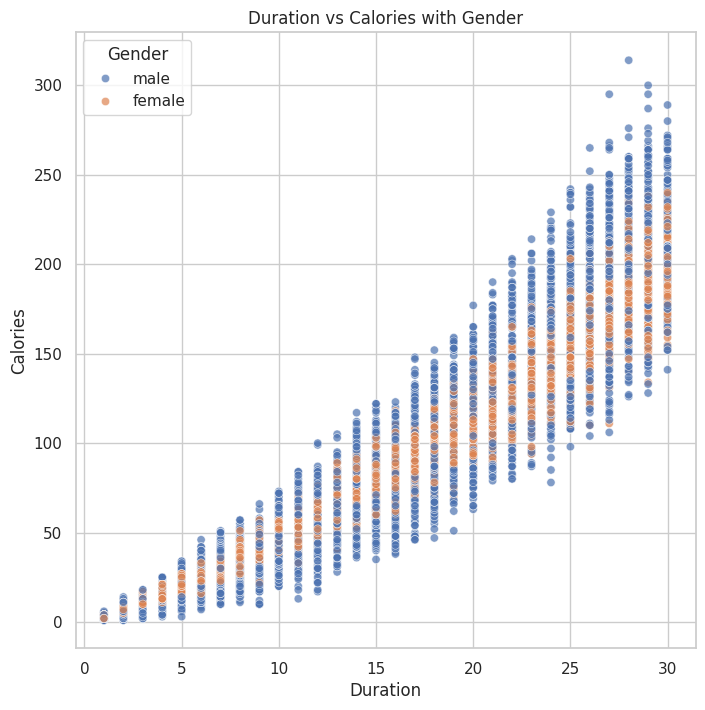

In [209]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=df, x="Duration", y="Calories", hue="Gender", alpha=0.7)

plt.title("Duration vs Calories with Gender")

plt.show()

<Figure size 800x800 with 0 Axes>

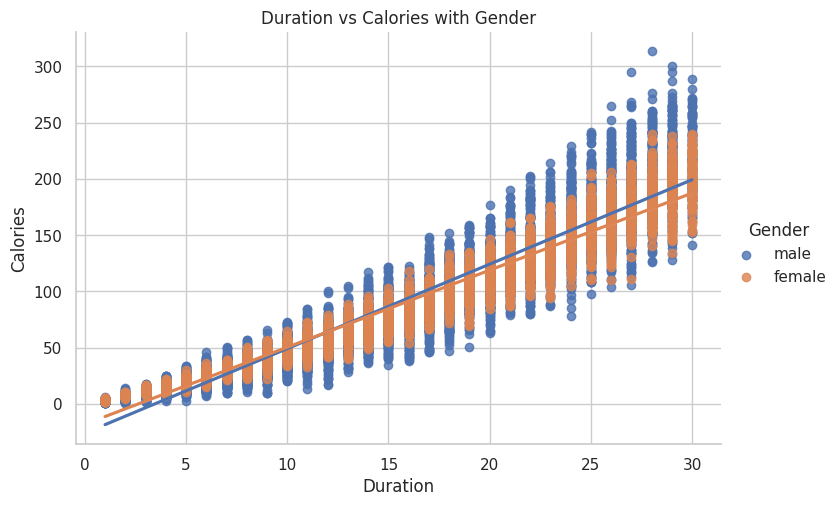

In [210]:
plt.figure(figsize=(8,8))

sns.lmplot(data=df, x="Duration", y="Calories", hue="Gender", aspect=1.5)

plt.title("Duration vs Calories with Gender")

plt.show()

#### Correlation matrix

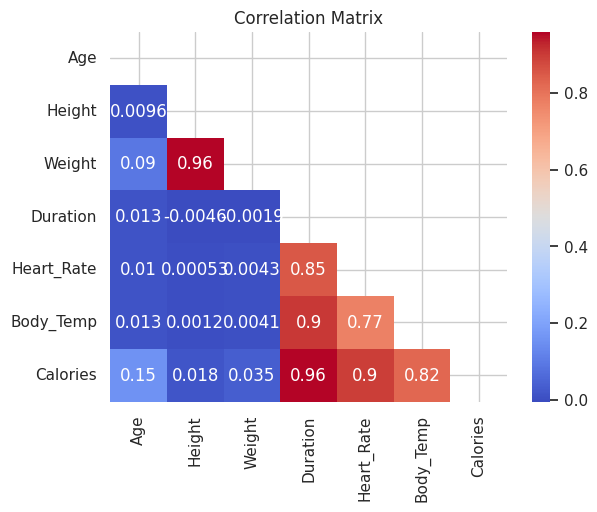

In [211]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

In [212]:
# Highly correlated
# Weight - Height
# Duration - Heart Rate
# With Calories: Duration and Heart Rate

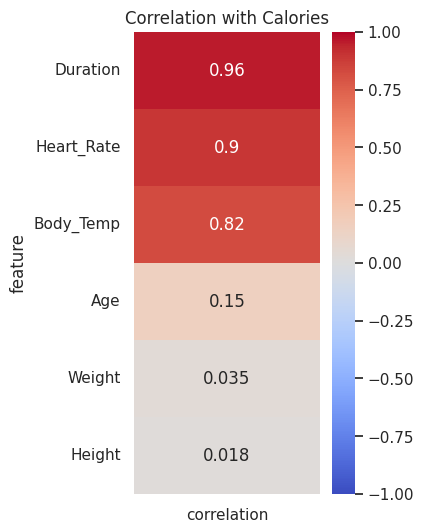

In [213]:
corr_with_target = df.corr(numeric_only=True)['Calories'].drop('Calories').sort_values(ascending=False)

corr_df = pd.DataFrame(corr_with_target).reset_index()
corr_df.columns = ['feature', 'correlation']

corr_df.set_index('feature', inplace=True)

plt.figure(figsize=(3,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with Calories')
plt.show()

## Feature importance and dimensionality reduction

### PCA

In [214]:



X = df.drop(columns=['Calories', 'Age_Group', 'Gender'])
numerical_features = X.columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=len(numerical_features))
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

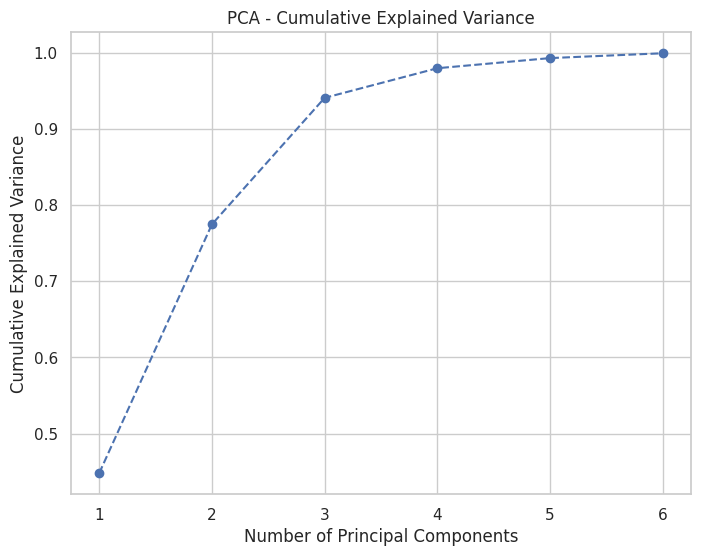

In [215]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(numerical_features)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

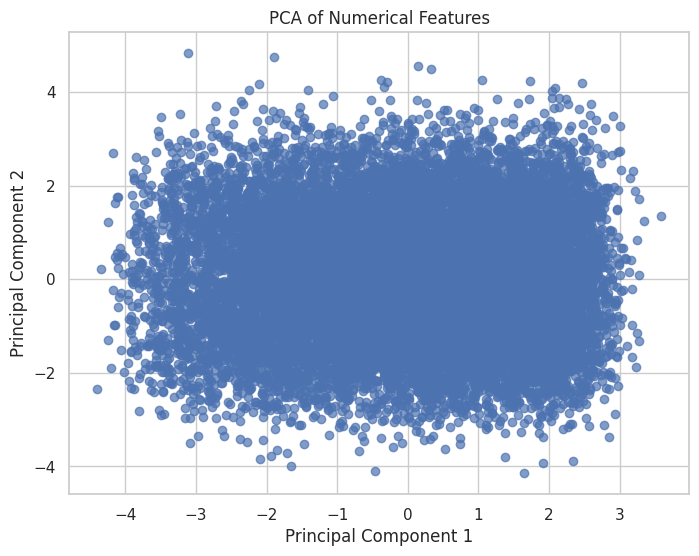

In [216]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numerical Features')
plt.show()

### Permutation importance

In [217]:
X = df.drop(columns=['Calories', 'Age_Group'])
y = df["Calories"]

numerical_features = X.drop(columns='Gender').columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X[numerical_features], y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=
 [
    ('num', StandardScaler(), numerical_features),
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

perm = PermutationImportance(pipeline, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names=numerical_features,)

### Partial dependency plots

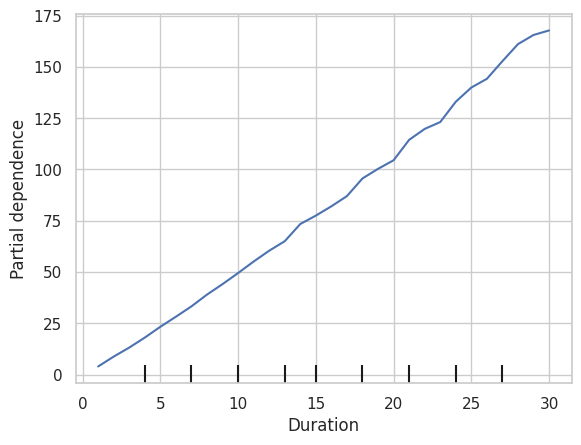

In [218]:



X = df.drop(columns=['Calories', 'Age_Group'])
y = df["Calories"]

numerical_features = X.drop(columns='Gender').columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X[numerical_features], y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

features_to_plot = ['Duration']
PartialDependenceDisplay.from_estimator(pipeline, X_train, features_to_plot)
plt.show()

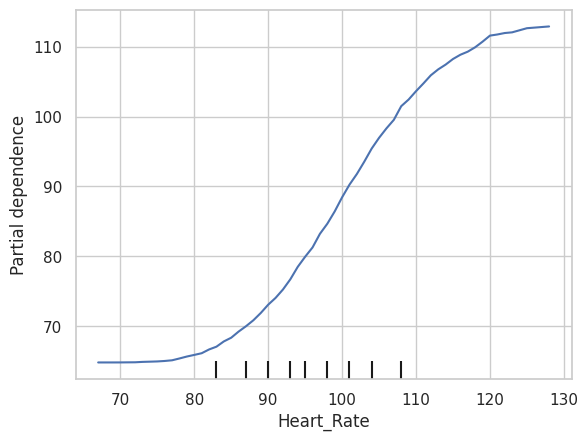

In [219]:
features_to_plot = ['Heart_Rate']
PartialDependenceDisplay.from_estimator(pipeline, X_train, features_to_plot)
plt.show()

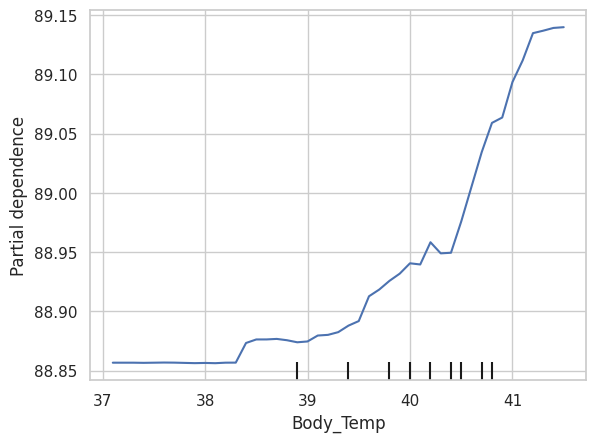

In [220]:
features_to_plot = ['Body_Temp']
PartialDependenceDisplay.from_estimator(pipeline, X_train, features_to_plot)
plt.show()

## Feature engineering

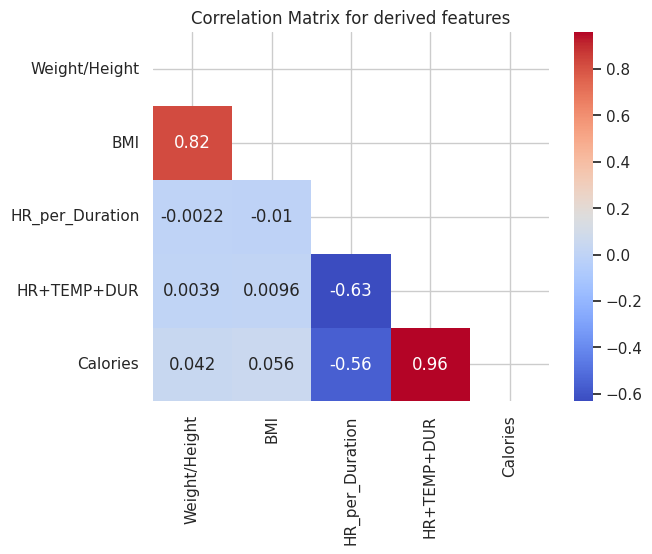

In [221]:
df['Weight/Height'] = df['Weight'] / df['Height']

df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

df["HR_per_Duration"] = df["Heart_Rate"] / df["Duration"]

df['HR+TEMP+DUR'] = df['Heart_Rate'] + df['Body_Temp'] + df['Duration']

cols = ["Weight/Height", "BMI", "HR_per_Duration","HR+TEMP+DUR", "Calories"]

df_new = df[cols]

corr = df_new.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix for derived features')

plt.show()

## Building model

### Trying different features selection

In [222]:
# 1 option - only features from original data

OPTION = "Original Features"

features = ["Gender", "Age", "Height", "Weight", "Duration",
                       "Heart_Rate", "Body_Temp"]
target = "Calories"

X, y = df[features], df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = OneHotEncoder(drop='first')

# Combine
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

In [223]:
# 2 option - only features from original data + PCA

OPTION = "Original Features + PCA"

features = ["Gender", "Age", "Height", "Weight", "Duration",
                       "Heart_Rate", "Body_Temp"]
target = "Calories"

X, y = df[features], df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90))
])

cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

In [224]:
# 3 option - derived features (feature with coolinearity combined)

OPTION = "Derived Features"

features = ["Gender", "Age", "BMI", "HR+TEMP+DUR"]
target = "Calories"

X, y = df[features], df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

In [225]:
# 4 option - derived features (feature with coolinearity combined) + PCA

OPTION = "Derived Features + PCA"

features = ["Gender", "Age", "BMI", "HR+TEMP+DUR"]
target = "Calories"

X, y = df[features], df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90))
])

cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

In [226]:
class FeatureEngineer:
    """
    A class to handle different feature engineering strategies for calorie prediction.

    Available options:
    - "Original Features": Use only original dataset features
    - "Original Features + PCA": Original features with PCA on numerical features
    - "Derived Features": Use engineered features (BMI, combined HR+TEMP+DUR)
    - "Derived Features + PCA": Engineered features with PCA on numerical features
    """

    def __init__(self, df, option="Original Features", test_size=0.2, random_state=42, pca_variance=0.90):
        """
        Initialize the FeatureEngineer.

        Parameters:
        -----------
        df : pandas.DataFrame
            The input dataframe containing the data
        option : str
            Feature engineering option to use
        test_size : float
            Proportion of data to use for testing
        random_state : int
            Random state for reproducibility
        pca_variance : float
            Variance to retain when using PCA (between 0 and 1)
        """
        self.df = df
        self.option = option
        self.test_size = test_size
        self.random_state = random_state
        self.pca_variance = pca_variance
        self.target = "Calories"

        self.features = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.preprocessor = None

    def _get_features_for_option(self):
        """Get the feature list based on the selected option."""
        if self.option in ["Original Features", "Original Features + PCA"]:
            return ["Gender", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
        elif self.option in ["Derived Features", "Derived Features + PCA"]:
            return ["Gender", "Age", "BMI", "HR+TEMP+DUR"]
        else:
            raise ValueError(f"Unknown option: {self.option}")

    def _create_preprocessor(self, X):
        """Create the preprocessor based on the selected option."""
        numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X.select_dtypes(include=['object']).columns.tolist()

        all_selected_features = self.features
        features_in_X = X.columns.tolist()

        numerical_features = [f for f in all_selected_features if f in numerical_features and f in features_in_X]
        categorical_features = [f for f in all_selected_features if f in categorical_features and f in features_in_X]


        if "PCA" in self.option and numerical_features:
            num_transformer = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=self.pca_variance))
            ])
        elif numerical_features:
             num_transformer = Pipeline(steps=[
                ('scaler', StandardScaler())
            ])
        else:
            num_transformer = 'drop'

        if categorical_features:
            cat_transformer = OneHotEncoder(drop='first')
        else:
            cat_transformer = 'drop'

        transformers = []
        if num_transformer != 'drop':
            transformers.append(('num', num_transformer, numerical_features))
        if cat_transformer != 'drop':
            transformers.append(('cat', cat_transformer, categorical_features))

        preprocessor = ColumnTransformer(transformers=transformers)


        return preprocessor

    def prepare_data(self):
        """
        Prepare the data based on the selected option.

        Returns:
        --------
        tuple: (X_train, X_test, y_train, y_test, preprocessor)
        """
        self.features = self._get_features_for_option()

        self.X = self.df[self.features]
        self.y = self.df[self.target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

        self.preprocessor = self._create_preprocessor(self.X_train)

        return self.X_train, self.X_test, self.y_train, self.y_test, self.preprocessor

    def get_feature_info(self):
        """Get information about the current feature engineering setup."""
        return {
            "option": self.option,
            "features": self.features,
            "n_features": len(self.features) if self.features else 0,
            "uses_pca": "PCA" in self.option,
            "pca_variance": self.pca_variance if "PCA" in self.option else None
        }

    def set_option(self, new_option):
        """Change the feature engineering option."""
        valid_options = [
            "Original Features",
            "Original Features + PCA",
            "Derived Features",
            "Derived Features + PCA"
        ]

        if new_option not in valid_options:
            raise ValueError(f"Option must be one of: {valid_options}")

        self.option = new_option
        self.features = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.preprocessor = None

### Training different models

#### Helper function

In [227]:
def evaluate_model_results(model, X_train, X_test, y_train, y_test, model_name=None):
    """
    Evaluation function for regression models on both train and test sets.

    Parameters:
    -----------
    model : sklearn model or pipeline
        Trained model to evaluate
    X_train, X_test : array-like
        Training and test feature sets
    y_train, y_test : array-like
        Training and test target values
    model_name : str
        Name of the model for display purposes

    Returns:
    --------
    dict : Dictionary containing all evaluation metrics and predictions
    """

    # If model is a GridSearchCV, extract best estimator and params
    best_params = None
    if hasattr(model, "best_estimator_"):
        best_model = model.best_estimator_
        best_params = model.best_params_
    else:
        best_model = model

    # Extract final estimator
    if hasattr(best_model, "named_steps"):
        final_estimator = best_model.named_steps.get("regressor", best_model)
    else:
        final_estimator = best_model

    if model_name is None:
        model_name = type(final_estimator).__name__

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = {
        'r2': r2_score(y_train, y_train_pred),
        'explained_variance': explained_variance_score(y_test, y_test_pred),
        'mse': mean_squared_error(y_train, y_train_pred),
        'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'mape': np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    }

    test_metrics = {
        'r2': r2_score(y_test, y_test_pred),
        'explained_variance': explained_variance_score(y_test, y_test_pred),
        'mse': mean_squared_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    }

    print("=" * 60)
    print(f"MODEL EVALUATION: {model_name}")
    if best_params:
        print(f"Best Parameters: {best_params}")
    print("=" * 60)

    print(f"\nTRAINING SET METRICS:")
    print(f"  R² Score:  {train_metrics['r2']:.4f}")
    print(f"  Explained Variance: {train_metrics['explained_variance']:.4f}")
    print(f"  MSE:       {train_metrics['mse']:.2f}")
    print(f"  RMSE:      {train_metrics['rmse']:.2f}")
    print(f"  MAE:       {train_metrics['mae']:.2f}")
    print(f"  MAPE:      {train_metrics['mape']:.2f}%")

    print(f"\nTEST SET METRICS:")
    print(f"  R² Score:  {test_metrics['r2']:.4f}")
    print(f"  Explained Variance: {test_metrics['explained_variance']:.4f}")
    print(f"  MSE:       {train_metrics['mse']:.2f}")
    print(f"  RMSE:      {test_metrics['rmse']:.2f}")
    print(f"  MAE:       {test_metrics['mae']:.2f}")
    print(f"  MAPE:      {test_metrics['mape']:.2f}%")

    results = {
        'model_name': model_name,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'best_params': best_params,
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred,
        },
        'model': best_model
    }

    return results

#### Option 1 - Original Features

In [228]:
OPTION = "Original Features" # Try different options

fe1 = FeatureEngineer(df, option=OPTION)
X_train, X_test, y_train, y_test, preprocessor1 = fe1.prepare_data()
print(f"Option 1 Info: {fe1.get_feature_info()}")

Option 1 Info: {'option': 'Original Features', 'features': ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], 'n_features': 7, 'uses_pca': False, 'pca_variance': None}


In [229]:
# Linear Regression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

lr_param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

grid_search_lr1 = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search_lr1.fit(X_train, y_train)

lr1_metrics = evaluate_model_results(grid_search_lr1, X_train, X_test, y_train, y_test)

MODEL EVALUATION: LinearRegression
Best Parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}

TRAINING SET METRICS:
  R² Score:  0.9672
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.27
  MAE:       8.31
  MAPE:      29.38%

TEST SET METRICS:
  R² Score:  0.9673
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.49
  MAE:       8.44
  MAPE:      29.22%


In [230]:
# Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', Ridge())
])

ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

grid_search_ridge = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)

ridge_metrics = evaluate_model_results(grid_search_ridge, X_train, X_test, y_train, y_test)

MODEL EVALUATION: Ridge
Best Parameters: {'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__positive': False}

TRAINING SET METRICS:
  R² Score:  0.9672
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.27
  MAE:       8.31
  MAPE:      29.38%

TEST SET METRICS:
  R² Score:  0.9673
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.49
  MAE:       8.44
  MAPE:      29.22%


In [231]:
# ElasticNet
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', ElasticNet())
])

elastic_param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

grid_search_elastic = GridSearchCV(
    elastic_pipeline,
    elastic_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_elastic.fit(X_train, y_train)
elastic_metrics = evaluate_model_results(grid_search_elastic, X_train, X_test, y_train, y_test)

MODEL EVALUATION: ElasticNet
Best Parameters: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 1.0, 'regressor__positive': False}

TRAINING SET METRICS:
  R² Score:  0.9672
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.27
  MAE:       8.31
  MAPE:      29.38%

TEST SET METRICS:
  R² Score:  0.9673
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.49
  MAE:       8.44
  MAPE:      29.22%


In [232]:
# Lasso
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', Lasso())
])

lasso_param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

grid_search_lasso = GridSearchCV(
    lasso_pipeline,
    lasso_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_lasso.fit(X_train, y_train)
lasso_metrics = evaluate_model_results(grid_search_lasso, X_train, X_test, y_train, y_test)

MODEL EVALUATION: Lasso
Best Parameters: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__positive': False}

TRAINING SET METRICS:
  R² Score:  0.9672
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.27
  MAE:       8.31
  MAPE:      29.38%

TEST SET METRICS:
  R² Score:  0.9673
  Explained Variance: 0.9673
  MSE:       126.95
  RMSE:      11.49
  MAE:       8.44
  MAPE:      29.22%


In [233]:
# DecisionTreeRegressor

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', DecisionTreeRegressor())
])

dt_param_grid = {
    'regressor__max_depth': [None, 3, 5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)
dt_metrics = evaluate_model_results(grid_search_dt, X_train, X_test, y_train, y_test)

MODEL EVALUATION: DecisionTreeRegressor
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5}

TRAINING SET METRICS:
  R² Score:  0.9992
  Explained Variance: 0.9937
  MSE:       3.09
  RMSE:      1.76
  MAE:       1.10
  MAPE:      1.51%

TEST SET METRICS:
  R² Score:  0.9937
  Explained Variance: 0.9937
  MSE:       3.09
  RMSE:      5.02
  MAE:       3.33
  MAPE:      4.65%


In [234]:
# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', RandomForestRegressor())
])

rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10],
    'regressor__min_samples_split': [5, 10]
}

grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
rf_metrics = evaluate_model_results(grid_search_rf, X_train, X_test, y_train, y_test)

MODEL EVALUATION: RandomForestRegressor
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9985
  Explained Variance: 0.9972
  MSE:       5.68
  RMSE:      2.38
  MAE:       1.65
  MAPE:      2.77%

TEST SET METRICS:
  R² Score:  0.9972
  Explained Variance: 0.9972
  MSE:       5.68
  RMSE:      3.38
  MAE:       2.28
  MAPE:      3.62%


In [235]:
# Gradient Boosting
gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', GradientBoostingRegressor())
])

gbr_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [5, 10]
}

grid_search_gbr = GridSearchCV(gbr_pipeline, gbr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)
gbr_metrics = evaluate_model_results(grid_search_gbr, X_train, X_test, y_train, y_test)


MODEL EVALUATION: GradientBoostingRegressor
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9996
  Explained Variance: 0.9993
  MSE:       1.56
  RMSE:      1.25
  MAE:       0.93
  MAPE:      1.91%

TEST SET METRICS:
  R² Score:  0.9993
  Explained Variance: 0.9993
  MSE:       1.56
  RMSE:      1.62
  MAE:       1.16
  MAPE:      2.28%


In [236]:
# Extreme Gradient Boosting
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', XGBRegressor(objective='reg:squarederror', eval_metric='rmse'))
])

xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [5, 10]
}

grid_search_xgb = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
xgb_metrics = evaluate_model_results(grid_search_xgb, X_train, X_test, y_train, y_test)

MODEL EVALUATION: XGBRegressor
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9996
  Explained Variance: 0.9993
  MSE:       1.74
  RMSE:      1.32
  MAE:       0.99
  MAPE:      2.12%

TEST SET METRICS:
  R² Score:  0.9993
  Explained Variance: 0.9993
  MSE:       1.74
  RMSE:      1.66
  MAE:       1.19
  MAPE:      2.49%


In [237]:
# LGBM
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', LGBMRegressor())
])

lgbm_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [-1, 5, 10]
}

grid_search_lgbm = GridSearchCV(lgbm_pipeline, lgbm_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)
lgbm_metrics = evaluate_model_results(grid_search_lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 7
[LightGBM] [Info] Start training from score 89.095417
MODEL EVALUATION: LGBMRegressor
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': -1, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9997
  Explained Variance: 0.9994
  MSE:       1.30
  RMSE:      1.14
  MAE:       0.82
  MAPE:      1.68%

TEST SET METRICS:
  R² Score:  0.9994
  Explained Variance: 0.9994
  MSE:       1.30
  RMSE:      1.56
  MAE:       1.08
  MAPE:      2.03%


In [238]:
# ADA
ada_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', AdaBoostRegressor())
])

ada_param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__learning_rate': [0.05, 0.1, 0.5]
}

grid_search_ada = GridSearchCV(ada_pipeline, ada_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)
ada_metrics = evaluate_model_results(grid_search_ada, X_train, X_test, y_train, y_test)

MODEL EVALUATION: AdaBoostRegressor
Best Parameters: {'regressor__learning_rate': 0.5, 'regressor__n_estimators': 50}

TRAINING SET METRICS:
  R² Score:  0.9670
  Explained Variance: 0.9708
  MSE:       127.49
  RMSE:      11.29
  MAE:       8.89
  MAPE:      35.46%

TEST SET METRICS:
  R² Score:  0.9674
  Explained Variance: 0.9708
  MSE:       127.49
  RMSE:      11.47
  MAE:       9.00
  MAPE:      35.47%


In [239]:
# KNeighborsRegressor - overfitting
knr_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', KNeighborsRegressor())
])

knr_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 10],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

grid_search_knr = GridSearchCV(knr_pipeline, knr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knr.fit(X_train, y_train)
knr_metrics = evaluate_model_results(grid_search_knr, X_train, X_test, y_train, y_test)

MODEL EVALUATION: KNeighborsRegressor
Best Parameters: {'regressor__n_neighbors': 10, 'regressor__p': 2, 'regressor__weights': 'distance'}

TRAINING SET METRICS:
  R² Score:  1.0000
  Explained Variance: 0.9946
  MSE:       0.00
  RMSE:      0.00
  MAE:       0.00
  MAPE:      0.00%

TEST SET METRICS:
  R² Score:  0.9946
  Explained Variance: 0.9946
  MSE:       0.00
  RMSE:      4.68
  MAE:       3.42
  MAPE:      7.08%


In [240]:
# SVR
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', SVR())
])

svr_param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10],
}

grid_search_svr = GridSearchCV(svr_pipeline, svr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
svr_metrics = evaluate_model_results(grid_search_svr, X_train, X_test, y_train, y_test)

MODEL EVALUATION: SVR
Best Parameters: {'regressor__C': 10, 'regressor__kernel': 'rbf'}

TRAINING SET METRICS:
  R² Score:  0.9994
  Explained Variance: 0.9996
  MSE:       2.50
  RMSE:      1.58
  MAE:       0.56
  MAPE:      1.71%

TEST SET METRICS:
  R² Score:  0.9996
  Explained Variance: 0.9996
  MSE:       2.50
  RMSE:      1.26
  MAE:       0.57
  MAPE:      1.84%


### Everything combined

In [241]:
param_grid = [
    # Linear models
    {'regressor': [LinearRegression()]},
    {'regressor': [Ridge()], 'regressor__alpha': [0.1, 1.0, 10.0]},
    {'regressor': [Lasso()], 'regressor__alpha': [0.01, 0.1, 1.0]},
    {'regressor': [ElasticNet()], 'regressor__alpha': [0.01, 0.1, 1.0], 'regressor__l1_ratio': [0.2, 0.5, 0.8]},

    # Tree-based
    {'regressor': [DecisionTreeRegressor()], 'regressor__max_depth': [3,5,7, None]},
    {'regressor': [RandomForestRegressor(n_jobs=-1)], 'regressor__n_estimators': [100,200], 'regressor__max_depth':[3,5,7,None]},

    # Support Vector / neighbors
    {'regressor': [SVR()], 'regressor__kernel':['linear','rbf'], 'regressor__C':[0.1,1,10]},
    {'regressor': [KNeighborsRegressor()], 'regressor__n_neighbors':[3,5,7], 'regressor__weights':['uniform','distance']},

    # Boosting
    {'regressor': [GradientBoostingRegressor()], 'regressor__n_estimators':[100,200], 'regressor__learning_rate':[0.05,0.1], 'regressor__max_depth':[3,5]},
    {'regressor': [XGBRegressor(objective='reg:squarederror', eval_metric='rmse', n_jobs=-1)], 'regressor__n_estimators':[100,200], 'regressor__learning_rate':[0.05,0.1]},
    {'regressor': [LGBMRegressor(n_jobs=-1)], 'regressor__n_estimators':[100,200], 'regressor__learning_rate':[0.05,0.1]},
    {'regressor': [AdaBoostRegressor()], 'regressor__n_estimators':[50,100], 'regressor__learning_rate':[0.05,0.1]}
]


In [242]:
OPTION = "Original Features"

fe_full1 = FeatureEngineer(df, option=OPTION)
X_train, X_test, y_train, y_test, preprocessor_full1 = fe_full1.prepare_data()

print(f"Option 1 Info: {fe_full1.get_feature_info()}")

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_full1),
    ('regressor', LinearRegression()) # placeholder
])

grid1 = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid1.fit(X_train, y_train)


evaluate_model_results(grid1, X_train, X_test, y_train, y_test)

Option 1 Info: {'option': 'Original Features', 'features': ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], 'n_features': 7, 'uses_pca': False, 'pca_variance': None}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 7
[LightGBM] [Info] Start training from score 89.095417
MODEL EVALUATION: LGBMRegressor
Best Parameters: {'regressor': LGBMRegressor(n_jobs=-1), 'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9997
  Explained Variance: 0.9994
  MSE:       1.30
  RMSE:      1.14
  MAE:       0.82
  MAPE:      1.68%

TEST SET METRICS:
  R² Score:  0.9994
  Explained Variance: 0.9994
  MSE:       1.30
  RMSE:      1.56
  MAE:       1.08
  MAPE:      2.03%


{'model_name': 'LGBMRegressor',
 'train_metrics': {'r2': 0.9996647117605134,
  'explained_variance': 0.999393686491703,
  'mse': 1.2961685013200517,
  'rmse': np.float64(1.1384939619163783),
  'mae': 0.8182513159219449,
  'mape': np.float64(1.6807575884399764)},
 'test_metrics': {'r2': 0.99939365727353,
  'explained_variance': 0.999393686491703,
  'mse': 2.4470728078307227,
  'rmse': np.float64(1.5643122475486544),
  'mae': 1.0762852829728387,
  'mape': np.float64(2.0347505119315414)},
 'best_params': {'regressor': LGBMRegressor(n_jobs=-1),
  'regressor__learning_rate': 0.1,
  'regressor__n_estimators': 200},
 'predictions': {'y_train_pred': array([ 17.2496955 , 167.09651684,  40.54095643, ...,  41.3414328 ,
          58.13134513,  59.76010963]),
  'y_test_pred': array([172.6640419 , 192.32838559,  51.58168842, ..., 122.47779328,
          20.30509972, 208.8578957 ])},
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                 

In [243]:
OPTION = "Original Features + PCA"

fe_full2 = FeatureEngineer(df, option=OPTION)
X_train, X_test, y_train, y_test, preprocessor_full2 = fe_full2.prepare_data()

print(f"Option 2 Info: {fe_full2.get_feature_info()}")

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_full2),
    ('regressor', LinearRegression()) # placeholder
])

grid2 = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid2.fit(X_train, y_train)


evaluate_model_results(grid2, X_train, X_test, y_train, y_test)

Option 2 Info: {'option': 'Original Features + PCA', 'features': ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], 'n_features': 7, 'uses_pca': True, 'pca_variance': 0.9}
MODEL EVALUATION: SVR
Best Parameters: {'regressor': SVR(), 'regressor__C': 10, 'regressor__kernel': 'rbf'}

TRAINING SET METRICS:
  R² Score:  0.9874
  Explained Variance: 0.9881
  MSE:       48.81
  RMSE:      6.99
  MAE:       5.08
  MAPE:      8.70%

TEST SET METRICS:
  R² Score:  0.9881
  Explained Variance: 0.9881
  MSE:       48.81
  RMSE:      6.94
  MAE:       5.13
  MAPE:      8.67%


{'model_name': 'SVR',
 'train_metrics': {'r2': 0.987374600855549,
  'explained_variance': 0.9880560389221437,
  'mse': 48.80769069826906,
  'rmse': np.float64(6.986250117070607),
  'mae': 5.075674643627513,
  'mape': np.float64(8.700955179382499)},
 'test_metrics': {'r2': 0.9880544906784433,
  'explained_variance': 0.9880560389221437,
  'mse': 48.209584712344544,
  'rmse': np.float64(6.943312229213413),
  'mae': 5.126916663910614,
  'mape': np.float64(8.665174960564379)},
 'best_params': {'regressor': SVR(),
  'regressor__C': 10,
  'regressor__kernel': 'rbf'},
 'predictions': {'y_train_pred': array([ 18.11213914, 155.31148472,  42.82374414, ...,  40.27218807,
          62.50138644,  65.05721318]),
  'y_test_pred': array([167.36888929, 168.67360105,  55.01420538, ..., 111.35913851,
          21.52368113, 216.79712249])},
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[

In [244]:
OPTION = "Derived Features"

fe_full3 = FeatureEngineer(df, option=OPTION)
X_train, X_test, y_train, y_test, preprocessor_full3 = fe_full3.prepare_data()

print(f"Option 3 Info: {fe_full3.get_feature_info()}")

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_full3),
    ('regressor', LinearRegression()) # placeholder
])

grid3 = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid3.fit(X_train, y_train)


evaluate_model_results(grid3, X_train, X_test, y_train, y_test)

Option 3 Info: {'option': 'Derived Features', 'features': ['Gender', 'Age', 'BMI', 'HR+TEMP+DUR'], 'n_features': 4, 'uses_pca': False, 'pca_variance': None}
MODEL EVALUATION: GradientBoostingRegressor
Best Parameters: {'regressor': GradientBoostingRegressor(), 'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}

TRAINING SET METRICS:
  R² Score:  0.9874
  Explained Variance: 0.9851
  MSE:       48.65
  RMSE:      6.97
  MAE:       5.37
  MAPE:      13.04%

TEST SET METRICS:
  R² Score:  0.9851
  Explained Variance: 0.9851
  MSE:       48.65
  RMSE:      7.77
  MAE:       5.98
  MAPE:      14.13%


{'model_name': 'GradientBoostingRegressor',
 'train_metrics': {'r2': 0.9874153301054858,
  'explained_variance': 0.9850632722727232,
  'mse': 48.65023820028908,
  'rmse': np.float64(6.974972272367044),
  'mae': 5.374970135200667,
  'mape': np.float64(13.036719623611173)},
 'test_metrics': {'r2': 0.9850538057439209,
  'explained_variance': 0.9850632722727232,
  'mse': 60.31972339725267,
  'rmse': np.float64(7.7665773283508015),
  'mae': 5.98224753357383,
  'mape': np.float64(14.128552933243622)},
 'best_params': {'regressor': GradientBoostingRegressor(),
  'regressor__learning_rate': 0.05,
  'regressor__max_depth': 5,
  'regressor__n_estimators': 200},
 'predictions': {'y_train_pred': array([ 14.71194909, 161.42562006,  39.74147687, ...,  40.56989829,
          64.57583113,  57.18667192]),
  'y_test_pred': array([173.5025145 , 183.48464427,  55.55535168, ..., 125.63061854,
          22.31854995, 218.33327512])},
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransfor

In [245]:
OPTION = "Derived Features + PCA"

fe_full4 = FeatureEngineer(df, option=OPTION)
X_train, X_test, y_train, y_test, preprocessor_full4 = fe_full4.prepare_data()

print(f"Option 4 Info: {fe_full4.get_feature_info()}")

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_full4),
    ('regressor', LinearRegression()) # placeholder
])

grid4 = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid4.fit(X_train, y_train)


evaluate_model_results(grid4, X_train, X_test, y_train, y_test)

Option 4 Info: {'option': 'Derived Features + PCA', 'features': ['Gender', 'Age', 'BMI', 'HR+TEMP+DUR'], 'n_features': 4, 'uses_pca': True, 'pca_variance': 0.9}
MODEL EVALUATION: SVR
Best Parameters: {'regressor': SVR(), 'regressor__C': 10, 'regressor__kernel': 'rbf'}

TRAINING SET METRICS:
  R² Score:  0.9843
  Explained Variance: 0.9847
  MSE:       60.75
  RMSE:      7.79
  MAE:       5.96
  MAPE:      14.52%

TEST SET METRICS:
  R² Score:  0.9847
  Explained Variance: 0.9847
  MSE:       60.75
  RMSE:      7.87
  MAE:       6.06
  MAPE:      14.37%


{'model_name': 'SVR',
 'train_metrics': {'r2': 0.9842850806072323,
  'explained_variance': 0.9846534050957184,
  'mse': 60.751261508238755,
  'rmse': np.float64(7.794309559431083),
  'mae': 5.964806227525637,
  'mape': np.float64(14.522679802335176)},
 'test_metrics': {'r2': 0.9846525398712649,
  'explained_variance': 0.9846534050957184,
  'mse': 61.93914878626238,
  'rmse': np.float64(7.870142869494961),
  'mae': 6.062405399134631,
  'mape': np.float64(14.36622192913741)},
 'best_params': {'regressor': SVR(),
  'regressor__C': 10,
  'regressor__kernel': 'rbf'},
 'predictions': {'y_train_pred': array([ 13.6910158 , 162.46000332,  37.08310529, ...,  44.43180677,
          66.99410018,  55.92369952]),
  'y_test_pred': array([171.55483318, 181.91518366,  53.97610435, ..., 126.25912847,
          22.69963233, 213.28755307])},
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps

## Save best model and pipepline

In [246]:
# Save best model

best_model = grid_search_lgbm.best_estimator_
# best_model = grid1.best_estimator_

dump(best_model, "best_model.joblib")

['best_model.joblib']

## Load and make predictions

In [247]:
best_model = load("/content/best_model.joblib")

new_sample = {
    "Gender": ["male"],
    "Age": [20],
    "Height": [172],
    "Weight": [64],
    "Duration": [25],
    "Heart_Rate": [120],
    "Body_Temp": [39.0]
}

# Convert to DataFrame
X_new = pd.DataFrame(new_sample)

y_pred = best_model.predict(X_new)

print("Predicted value:", y_pred[0])

Predicted value: 189.2722002722237


## ⚠️ Important Notes on Model Predictions

* **Duration**: The maximum duration in the training dataset was **30 minutes**. Predictions for activities longer than this may be unreliable.
* **Heart Rate**: The model was trained on heart rates up to **128 bpm**. Predictions for higher heart rates may be less accurate.
* **Body Temperature**: The model saw body temperatures up to **41.5°C**. Inputs above this range could reduce prediction reliability.
* **Age**: The training dataset included ages from **20 to 79 years**. Predictions for ages outside this range may be less accurate.
* **Height**: Heights in the dataset ranged from **123 cm to 222 cm**.
* **Weight**: Weights ranged from **36 kg to 132 kg**.

> Please ensure that input values are within the range of the training data for the most accurate predictions. Predictions outside these ranges should be interpreted with caution.

##